In [ ]:
import tensorflow as tf
import pickle
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,Conv3D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage.morphology as morp
from skimage.filters import rank
from sklearn.utils import shuffle

In [ ]:
import pickle
training_file = "/content/train.p"
validation_file= "/content/valid.p"
testing_file = "/content/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Print the shape of variables


In [ ]:

with open("/content/signnames.csv", "r") as f:
    signnames = f.read()
classes = { int(line.split(",")[0]):line.split(",")[1] for line in signnames.split("\n")[1:] if len(line) > 0}
print(classes[y_train[232]])

Wild animals crossing


In [ ]:
def equalise(trainx): # rgb to gray and histogramequalisation
    kernel = morp.disk(30)
    m,n,z=trainx.shape
    graytrain=(cv2.cvtColor(trainx, cv2.COLOR_RGB2GRAY))
    localgray=(rank.equalize(graytrain, selem=kernel))
    return localgray
def showim(im):
    m,n,z=im.shape
    im=np.reshape(im,(m,n))
    fig=plt.imshow(im, cmap = 'gray')
    plt.show()
def normalize(im):
   return im/255
def normalized_images(localtrain):
   n_training = localtrain.shape
   images = np.zeros((n_training[0], n_training[1], n_training[2]))
   for i, img in enumerate(localtrain):
       images[i] = normalize(img)
   return images 
def preprocess(images):
   shape = images.shape
   equalimages= list(map(equalise,images))
   equalimages=np.reshape(equalimages,(shape[0],shape[1],shape[2]))
   equalimages=normalized_images(equalimages)
   m,n,z=equalimages.shape
   equalimages=np.reshape(equalimages,(m,n,z,1))
   return equalimages

In [ ]:
IMG_HEIGHT=32
IMG_WIDTH=32
batch_size=128
conv=0.6
flat=0.5
epochs=30

In [ ]:
X_train,y_train=shuffle(X_train,y_train)  #shuffle the data for randomness in data
trainxp=preprocess(X_train)
testxp=preprocess(X_test)
validxp=preprocess(X_valid)
trainyp=y_train
testyp=y_test
validyp=y_valid


In [ ]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH,1)),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(conv),
    Conv2D(64, 3, padding='same', activation='relu'),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(conv),
    Conv2D(128, 3, padding='same', activation='relu'),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(conv),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(flat),
    Dense(128, activation='relu'),
    Dropout(flat),
    Dense(43,activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_65 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 8, 8, 64)        

In [ ]:
model.fit(trainxp,trainyp,batch_size=batch_size,initial_epoch=30,epochs=1000,validation_data=(validxp,validyp))

Train on 34799 samples, validate on 4410 samples
Epoch 31/1000
34799/34799 [==============================] - 246s 7ms/sample - loss: 0.4750 - acc: 0.8502 - val_loss: 0.2883 - val_acc: 0.9229
Epoch 32/1000
34799/34799 [==============================] - 246s 7ms/sample - loss: 0.4557 - acc: 0.8571 - val_loss: 0.1835 - val_acc: 0.9524
Epoch 33/1000
34799/34799 [==============================] - 247s 7ms/sample - loss: 0.4563 - acc: 0.8595 - val_loss: 0.1571 - val_acc: 0.9560
Epoch 34/1000
34799/34799 [==============================] - 247s 7ms/sample - loss: 0.4475 - acc: 0.8609 - val_loss: 0.1558 - val_acc: 0.9574
Epoch 35/1000
34799/34799 [==============================] - 246s 7ms/sample - loss: 0.4427 - acc: 0.8627 - val_loss: 0.1536 - val_acc: 0.9556
Epoch 36/1000
34799/34799 [==============================] - 246s 7ms/sample - loss: 0.4300 - acc: 0.8664 - val_loss: 0.1267 - val_acc: 0.9680
Epoch 37/1000
34799/34799 [==============================] - 246s 7ms/sample - loss: 0.4330 -

KeyboardInterrupt: ignored

In [ ]:
accuracy=model.evaluate(testxp,testyp,batch_size=batch_size)
print(accuracy)

12630/12630 [==============================] - 21s 2ms/sample - loss: 0.1495 - acc: 0.9563
[0.14953945527120138, 0.95629454]


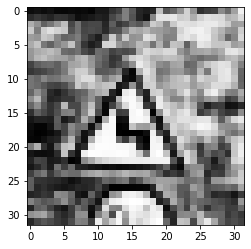

Double curve Wild animals crossing


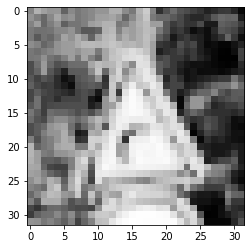

Dangerous curve to the right Children crossing


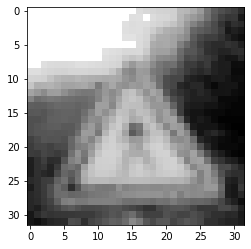

Pedestrians Right-of-way at the next intersection


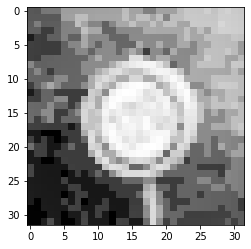

Speed limit (120km/h) Speed limit (80km/h)


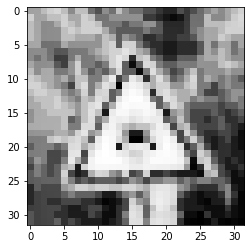

Beware of ice/snow Double curve


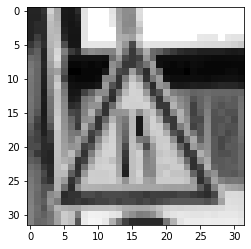

Road narrows on the right Traffic signals


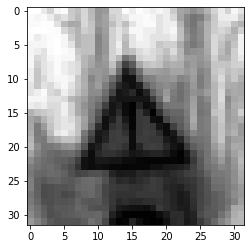

General caution Traffic signals


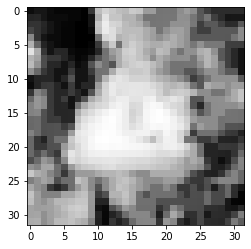

Road work Bumpy road


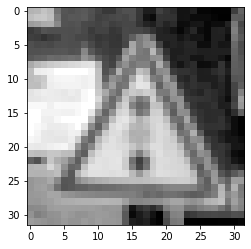

Traffic signals General caution


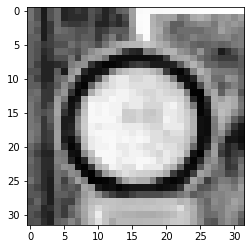

No vehicles Vehicles over 3.5 metric tons prohibited


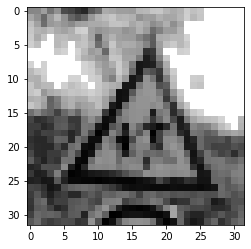

Children crossing Road narrows on the right


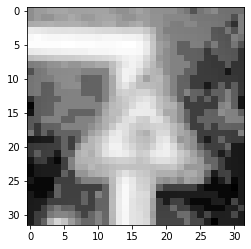

Beware of ice/snow Children crossing


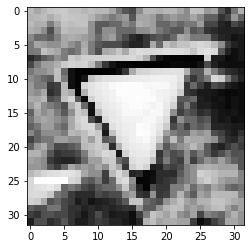

Yield Go straight or right


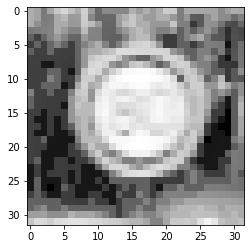

Speed limit (80km/h) Speed limit (50km/h)


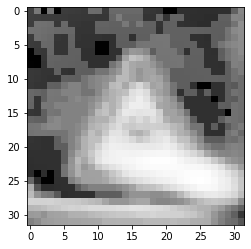

Beware of ice/snow Slippery road


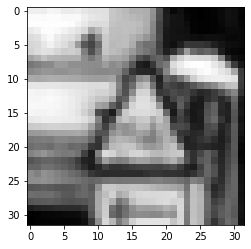

Bicycles crossing Children crossing


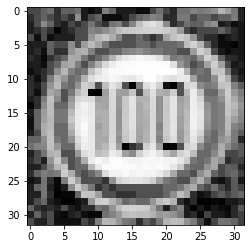

Speed limit (100km/h) Speed limit (120km/h)


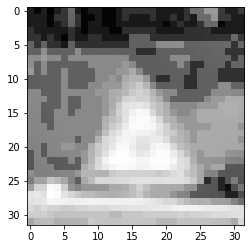

Beware of ice/snow Wild animals crossing


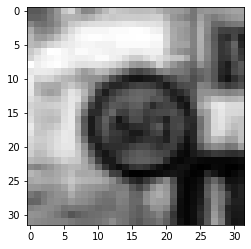

Speed limit (60km/h) Roundabout mandatory


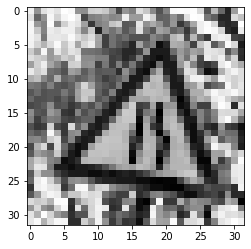

Road narrows on the right General caution


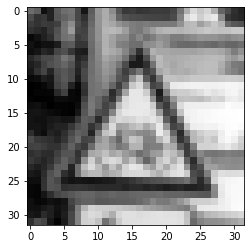

Bicycles crossing Wild animals crossing


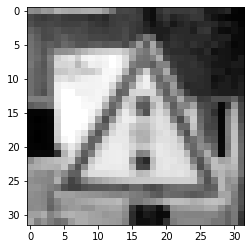

Traffic signals General caution


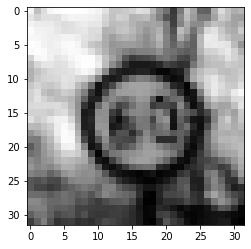

Speed limit (60km/h) Speed limit (80km/h)


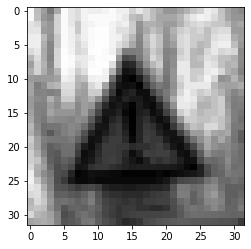

General caution Traffic signals


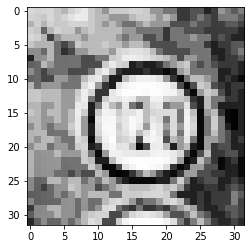

Speed limit (120km/h) Speed limit (100km/h)


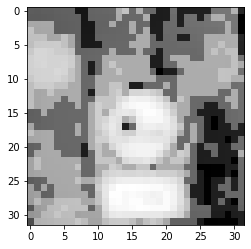

No passing for vehicles over 3.5 metric tons Speed limit (50km/h)


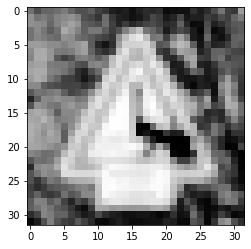

General caution Children crossing


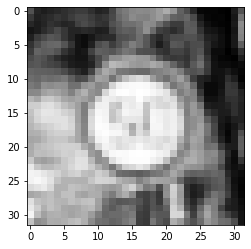

Speed limit (50km/h) Speed limit (80km/h)


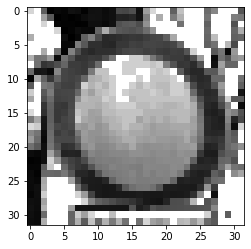

No vehicles End of all speed and passing limits


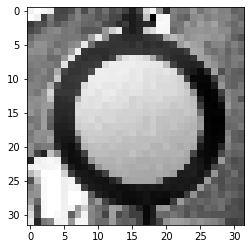

No vehicles End of all speed and passing limits


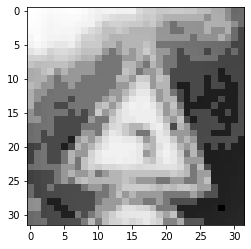

Dangerous curve to the left Slippery road


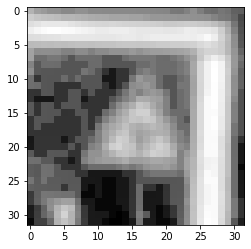

Beware of ice/snow Roundabout mandatory


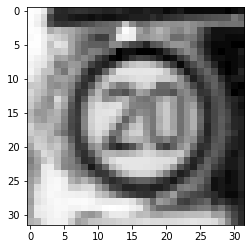

Speed limit (20km/h) Speed limit (30km/h)


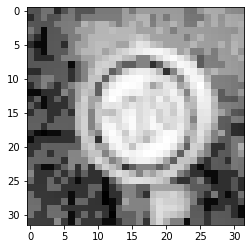

Speed limit (120km/h) Speed limit (80km/h)


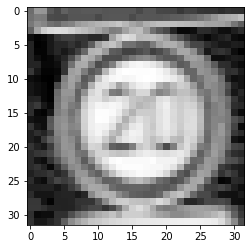

Speed limit (20km/h) Speed limit (30km/h)


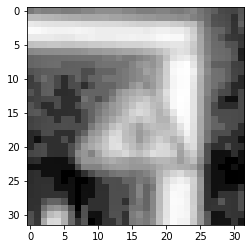

Beware of ice/snow Roundabout mandatory


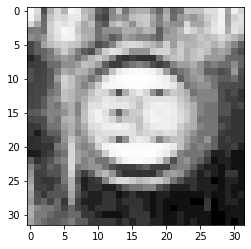

Speed limit (80km/h) Speed limit (50km/h)


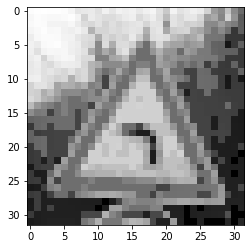

Dangerous curve to the left Slippery road


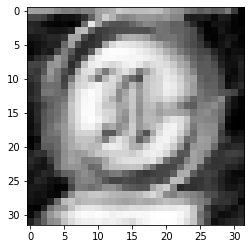

Speed limit (30km/h) Roundabout mandatory


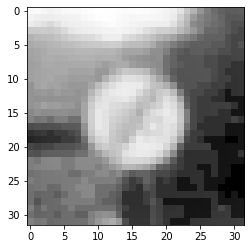

End of speed limit (80km/h) Roundabout mandatory


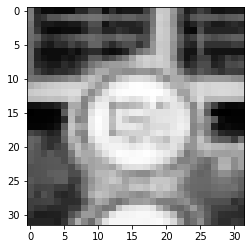

Speed limit (100km/h) Speed limit (80km/h)


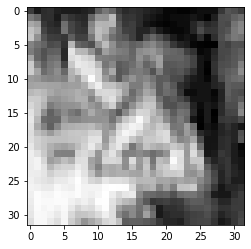

Bumpy road Keep right


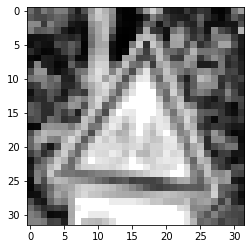

Bicycles crossing Children crossing


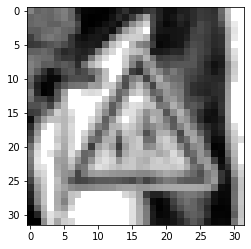

Children crossing Traffic signals


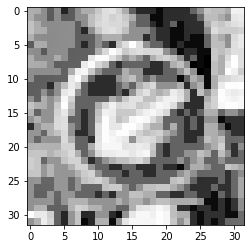

Keep left Stop


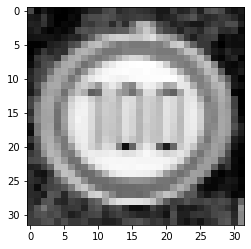

Speed limit (100km/h) Speed limit (120km/h)


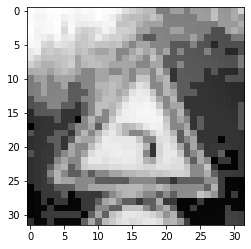

Dangerous curve to the left Slippery road


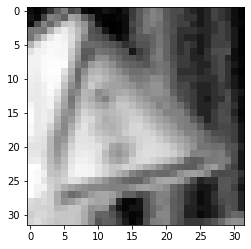

Traffic signals Children crossing


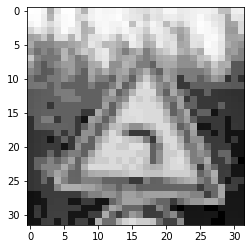

Dangerous curve to the left Slippery road


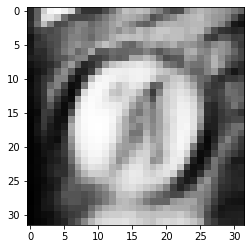

Speed limit (30km/h) End of all speed and passing limits


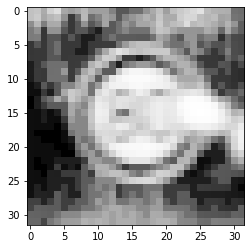

Speed limit (80km/h) Speed limit (50km/h)


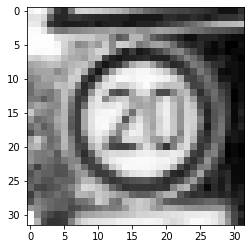

Speed limit (20km/h) Speed limit (30km/h)


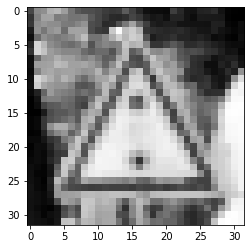

Traffic signals General caution


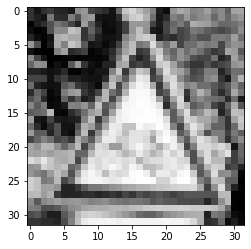

Bicycles crossing Children crossing


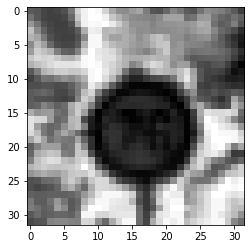

Speed limit (70km/h) Roundabout mandatory


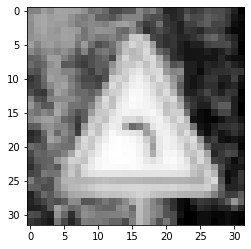

Dangerous curve to the left Slippery road


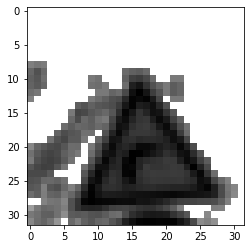

Dangerous curve to the right End of speed limit (80km/h)


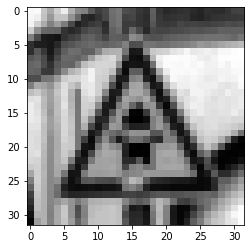

Right-of-way at the next intersection Beware of ice/snow


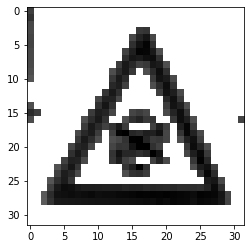

Beware of ice/snow Slippery road


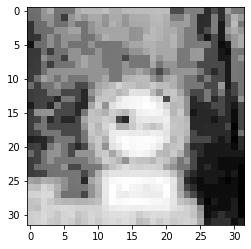

No passing for vehicles over 3.5 metric tons Roundabout mandatory


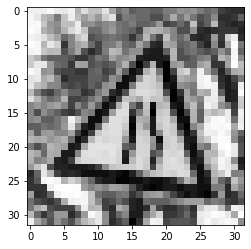

Road narrows on the right Traffic signals


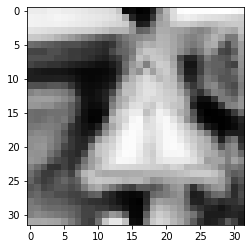

Traffic signals General caution


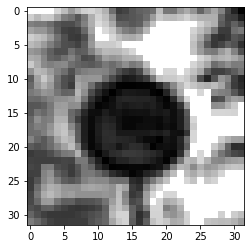

Speed limit (70km/h) Roundabout mandatory


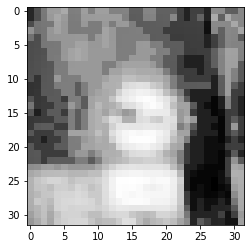

No passing for vehicles over 3.5 metric tons Dangerous curve to the right


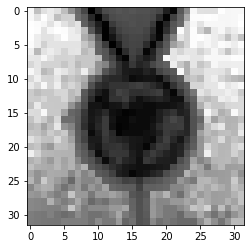

Roundabout mandatory Priority road


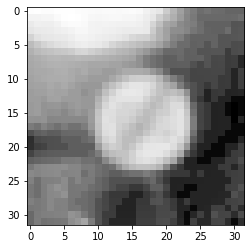

End of speed limit (80km/h) Roundabout mandatory


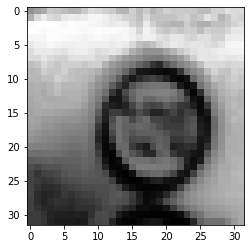

Speed limit (120km/h) Speed limit (50km/h)


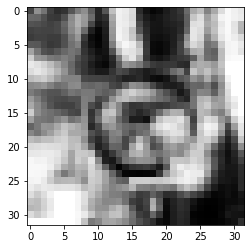

Speed limit (70km/h) Turn right ahead


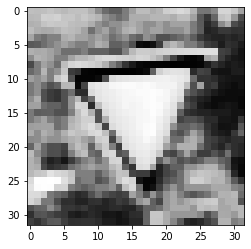

Yield Go straight or right


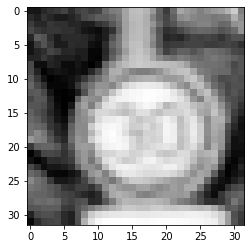

Speed limit (30km/h) Speed limit (50km/h)


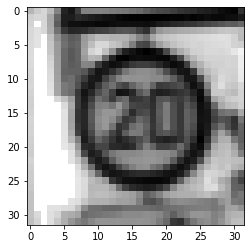

Speed limit (20km/h) Speed limit (30km/h)


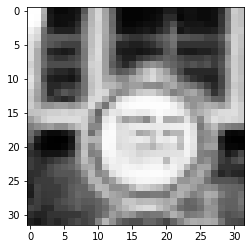

Speed limit (100km/h) Speed limit (80km/h)


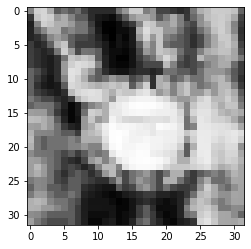

Speed limit (70km/h) Dangerous curve to the right


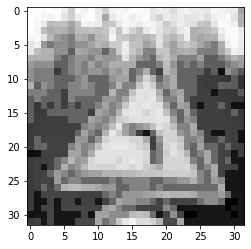

Dangerous curve to the left Slippery road


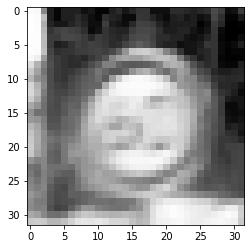

Speed limit (60km/h) Speed limit (50km/h)


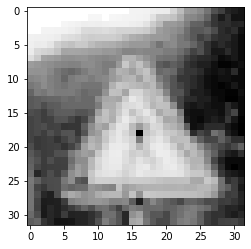

Pedestrians Children crossing


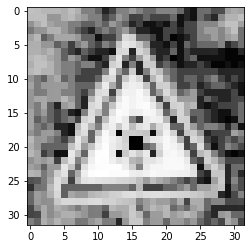

Beware of ice/snow Children crossing


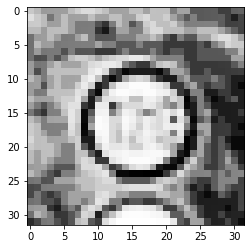

Speed limit (120km/h) Speed limit (100km/h)


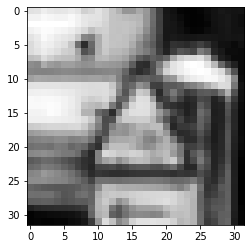

Bicycles crossing Children crossing


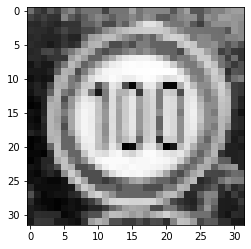

Speed limit (100km/h) Speed limit (120km/h)


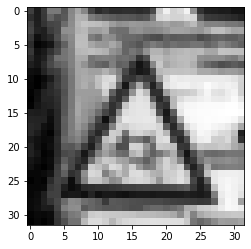

Bicycles crossing Children crossing


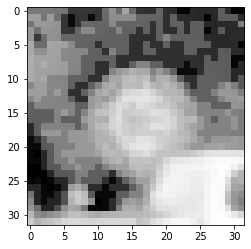

Speed limit (80km/h) Roundabout mandatory


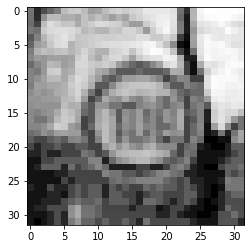

Speed limit (100km/h) Speed limit (80km/h)


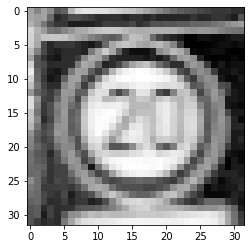

Speed limit (20km/h) Speed limit (30km/h)


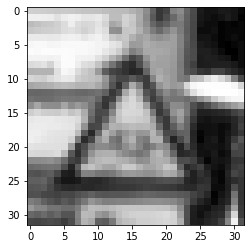

Bicycles crossing Double curve


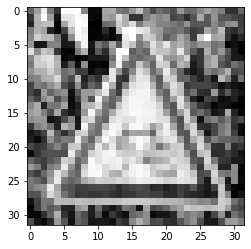

Bicycles crossing Children crossing


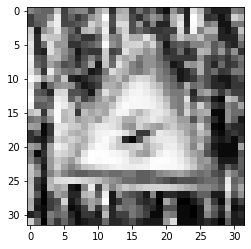

Beware of ice/snow Children crossing


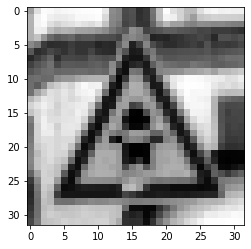

Right-of-way at the next intersection Beware of ice/snow


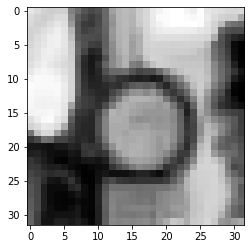

No vehicles Speed limit (70km/h)


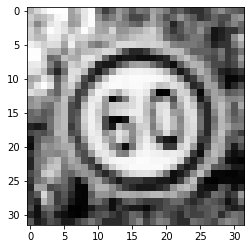

Speed limit (60km/h) Speed limit (80km/h)


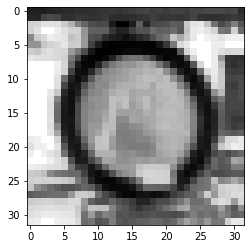

No vehicles Turn right ahead


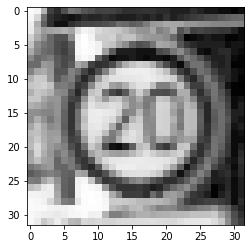

Speed limit (20km/h) Speed limit (30km/h)


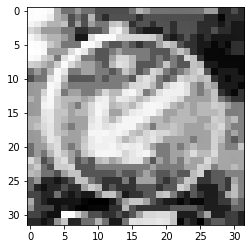

Keep left Roundabout mandatory


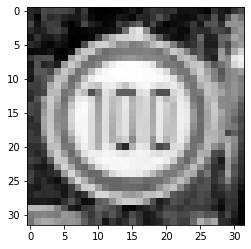

Speed limit (100km/h) Speed limit (120km/h)


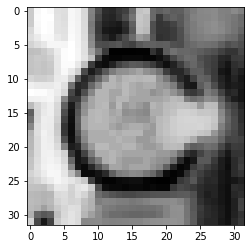

No vehicles Roundabout mandatory


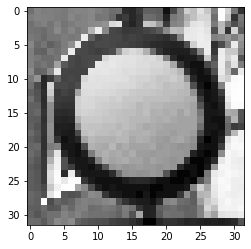

No vehicles End of all speed and passing limits


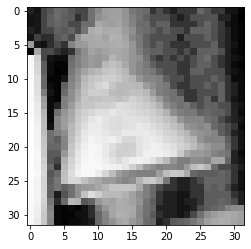

Traffic signals Bumpy road


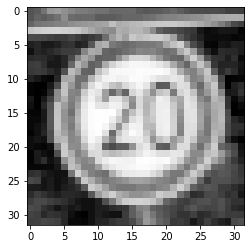

Speed limit (20km/h) Speed limit (120km/h)


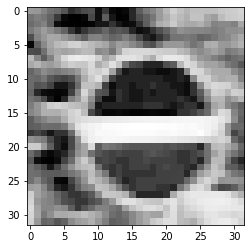

No entry Stop


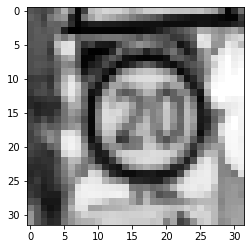

Speed limit (20km/h) Speed limit (120km/h)


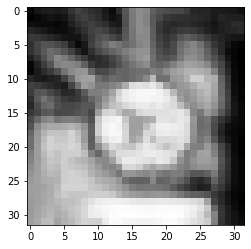

Speed limit (30km/h) Roundabout mandatory


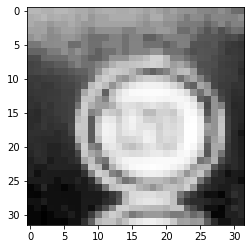

Speed limit (120km/h) Speed limit (100km/h)


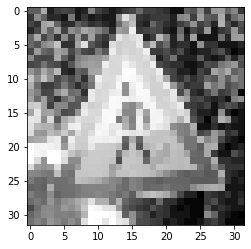

Pedestrians Children crossing


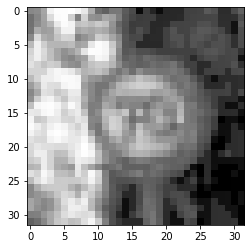

Speed limit (70km/h) Roundabout mandatory


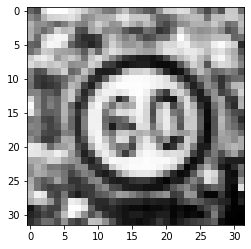

Speed limit (60km/h) Speed limit (80km/h)


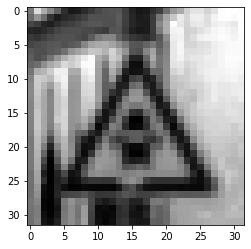

Right-of-way at the next intersection Beware of ice/snow


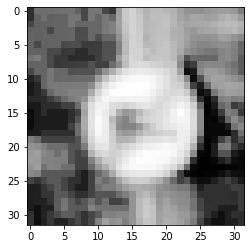

End of no passing by vehicles over 3.5 metric tons Priority road


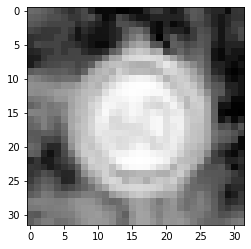

Speed limit (60km/h) Speed limit (80km/h)


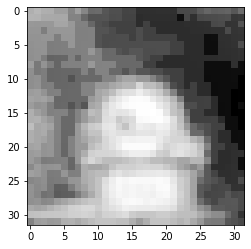

No passing for vehicles over 3.5 metric tons Dangerous curve to the right


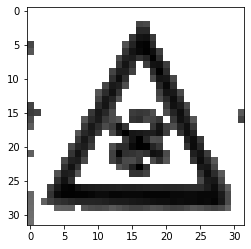

Beware of ice/snow Slippery road


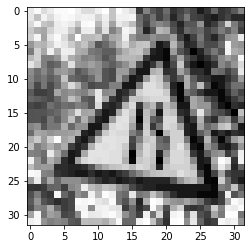

Road narrows on the right Traffic signals


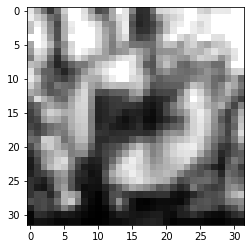

End of no passing by vehicles over 3.5 metric tons Priority road


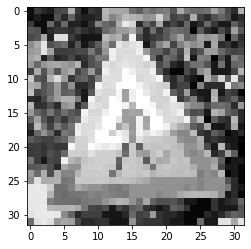

Pedestrians Children crossing


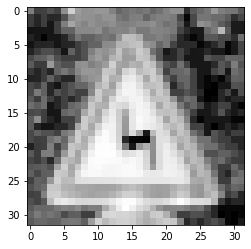

Double curve Wild animals crossing


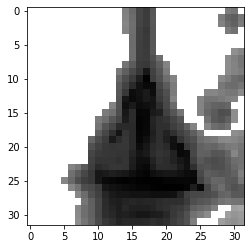

General caution Children crossing


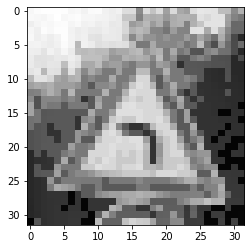

Dangerous curve to the left Slippery road


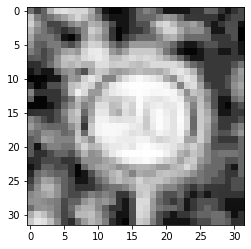

Speed limit (50km/h) Speed limit (80km/h)


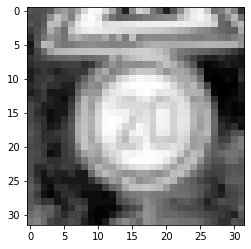

Speed limit (20km/h) Speed limit (120km/h)


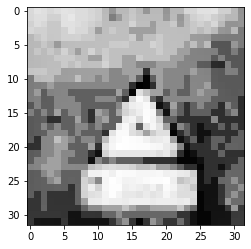

Wild animals crossing Children crossing


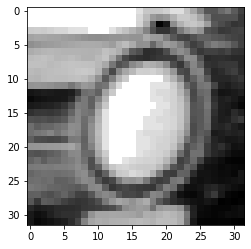

No vehicles End of all speed and passing limits


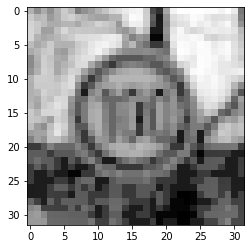

Speed limit (100km/h) Speed limit (30km/h)


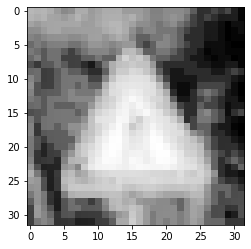

Pedestrians Children crossing


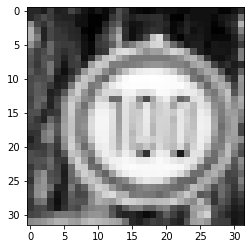

Speed limit (100km/h) Speed limit (120km/h)


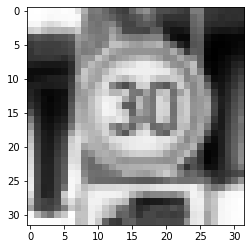

Speed limit (30km/h) Speed limit (50km/h)


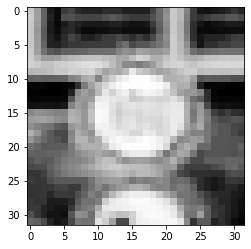

Speed limit (100km/h) Speed limit (50km/h)


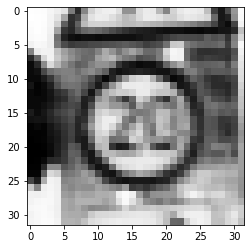

Speed limit (20km/h) Speed limit (30km/h)


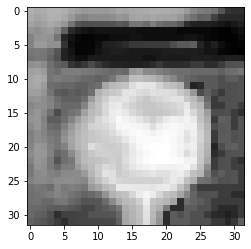

Keep right Priority road


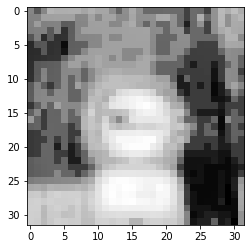

No passing for vehicles over 3.5 metric tons Roundabout mandatory


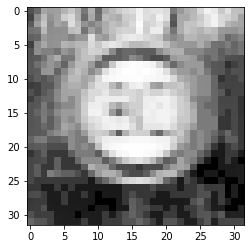

Speed limit (80km/h) Speed limit (50km/h)


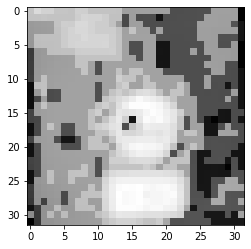

No passing for vehicles over 3.5 metric tons Roundabout mandatory


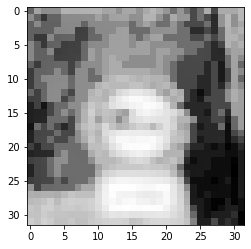

No passing for vehicles over 3.5 metric tons Speed limit (50km/h)


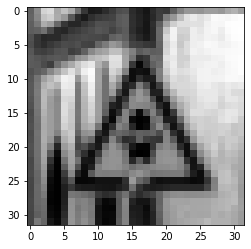

Right-of-way at the next intersection Beware of ice/snow


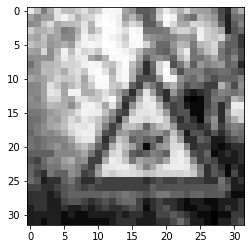

Beware of ice/snow Children crossing


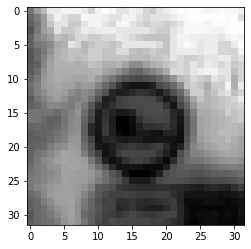

No passing for vehicles over 3.5 metric tons Roundabout mandatory


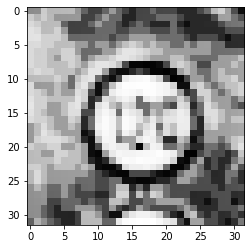

Speed limit (120km/h) Speed limit (100km/h)


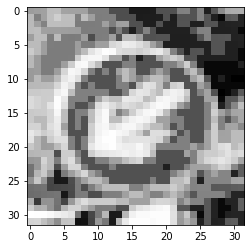

Keep left Speed limit (30km/h)


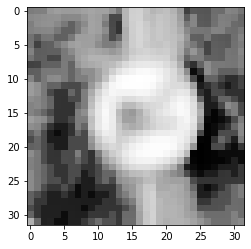

End of no passing by vehicles over 3.5 metric tons Roundabout mandatory


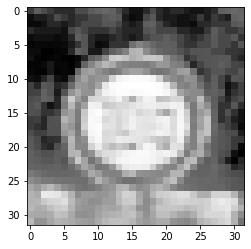

Speed limit (100km/h) Speed limit (120km/h)


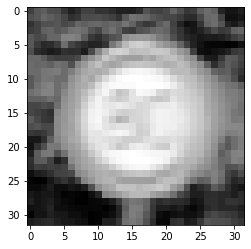

Speed limit (80km/h) Speed limit (50km/h)


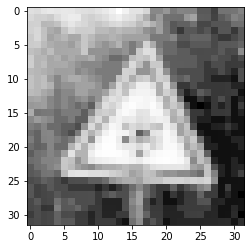

Beware of ice/snow Children crossing


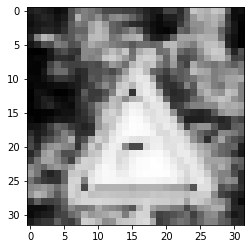

Dangerous curve to the right Wild animals crossing


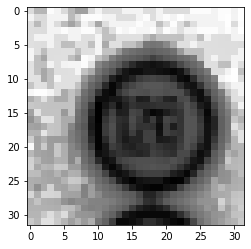

Speed limit (120km/h) Speed limit (100km/h)


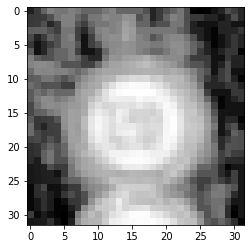

Speed limit (120km/h) Speed limit (50km/h)


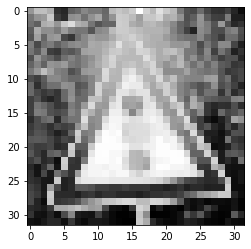

Traffic signals General caution


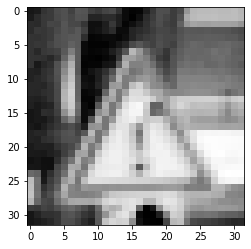

General caution Traffic signals


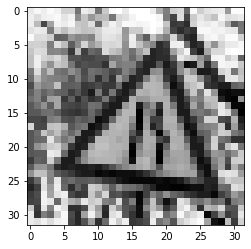

Road narrows on the right Traffic signals


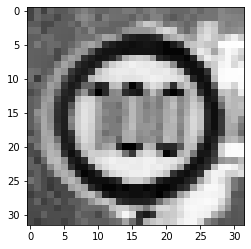

Speed limit (100km/h) Speed limit (120km/h)


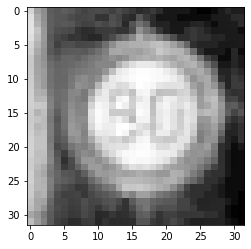

Speed limit (80km/h) Speed limit (50km/h)


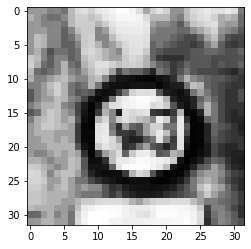

Speed limit (80km/h) Speed limit (50km/h)


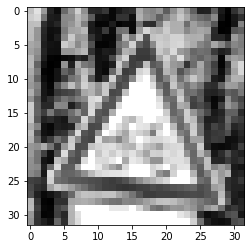

Bicycles crossing Children crossing


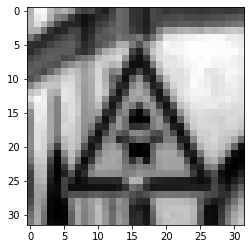

Right-of-way at the next intersection Beware of ice/snow


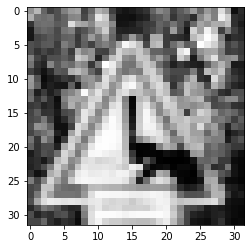

General caution Bumpy road


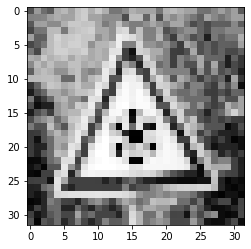

Beware of ice/snow Children crossing


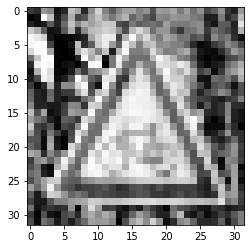

Bicycles crossing Children crossing


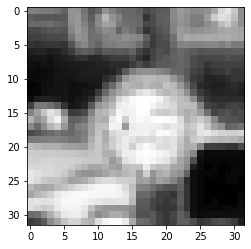

Speed limit (60km/h) Roundabout mandatory


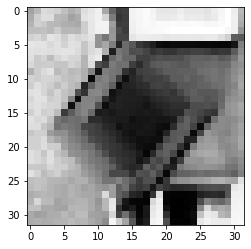

Priority road Ahead only


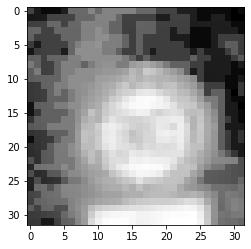

Speed limit (80km/h) Speed limit (50km/h)


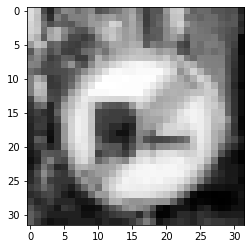

End of no passing by vehicles over 3.5 metric tons End of speed limit (80km/h)


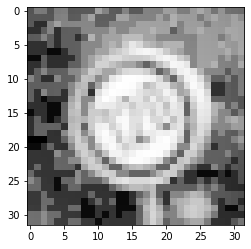

Speed limit (120km/h) Speed limit (80km/h)


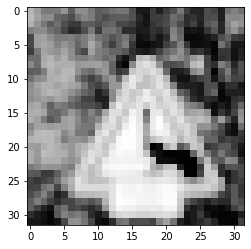

General caution Road work


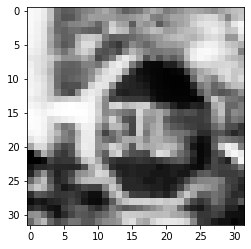

Stop Keep right


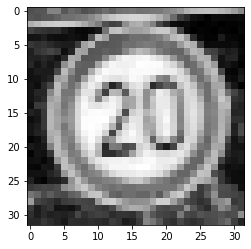

Speed limit (20km/h) Speed limit (30km/h)


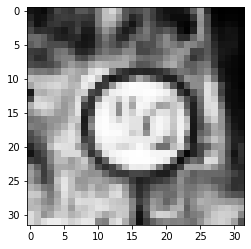

Speed limit (50km/h) Speed limit (30km/h)


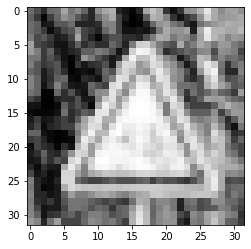

Bicycles crossing Children crossing


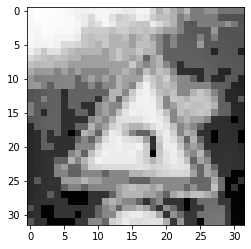

Dangerous curve to the left Slippery road


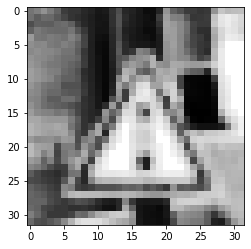

Traffic signals General caution


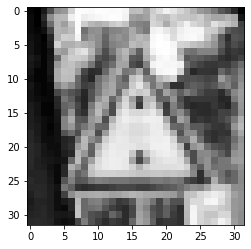

Traffic signals Children crossing


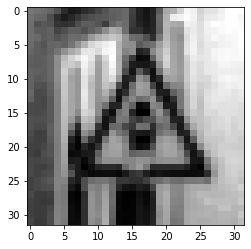

Right-of-way at the next intersection Children crossing


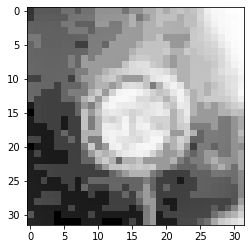

Speed limit (120km/h) Speed limit (50km/h)


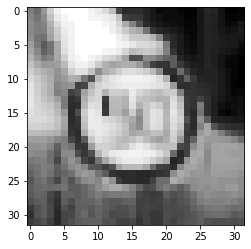

Speed limit (50km/h) Speed limit (80km/h)


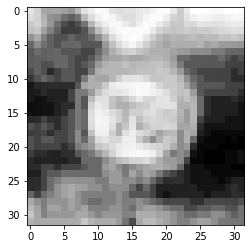

Speed limit (70km/h) Speed limit (100km/h)


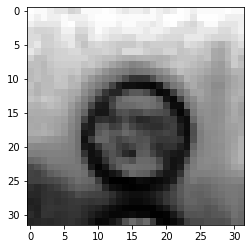

Speed limit (120km/h) Speed limit (50km/h)


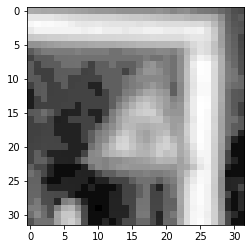

Beware of ice/snow Roundabout mandatory


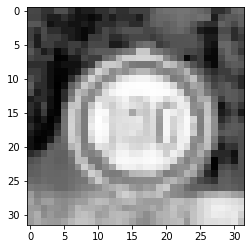

Speed limit (100km/h) Speed limit (80km/h)


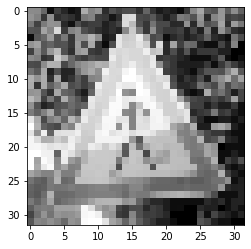

Pedestrians Children crossing


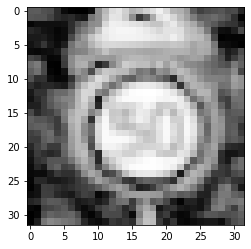

Speed limit (50km/h) Speed limit (80km/h)


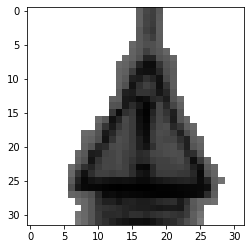

General caution Traffic signals


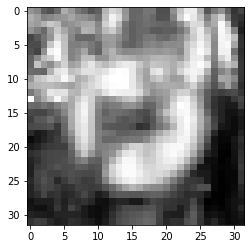

End of no passing by vehicles over 3.5 metric tons Priority road


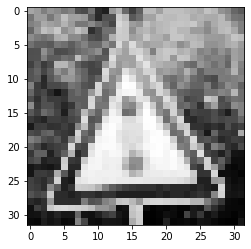

Traffic signals General caution


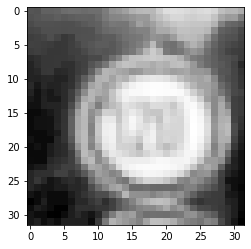

Speed limit (120km/h) Speed limit (100km/h)


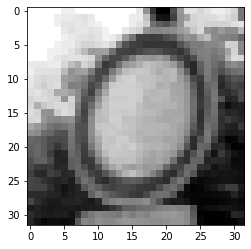

No vehicles End of all speed and passing limits


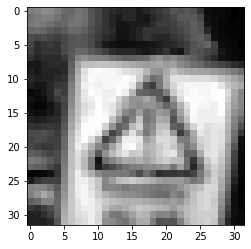

General caution No vehicles


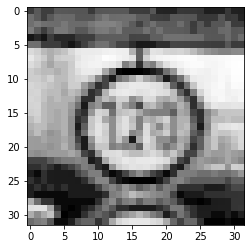

Speed limit (120km/h) Speed limit (100km/h)


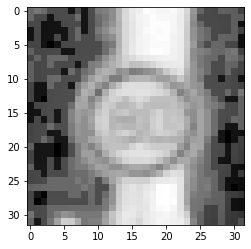

Speed limit (80km/h) Speed limit (50km/h)


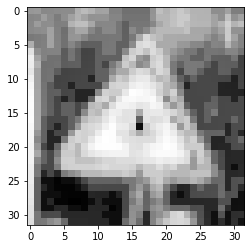

Beware of ice/snow Children crossing


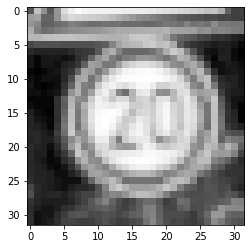

Speed limit (20km/h) Speed limit (30km/h)


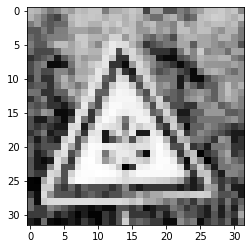

Beware of ice/snow Children crossing


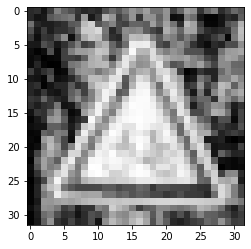

Bicycles crossing Children crossing


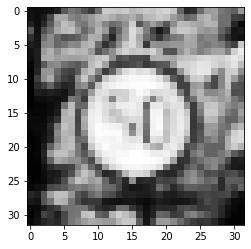

Speed limit (50km/h) Speed limit (80km/h)


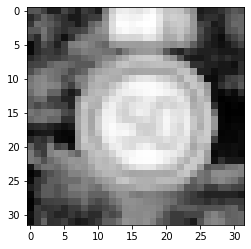

Speed limit (50km/h) Speed limit (80km/h)


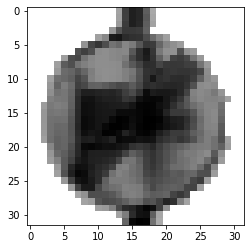

End of no passing by vehicles over 3.5 metric tons Ahead only


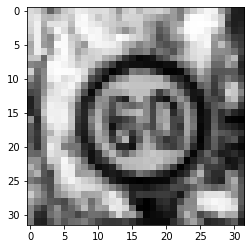

Speed limit (60km/h) Speed limit (80km/h)


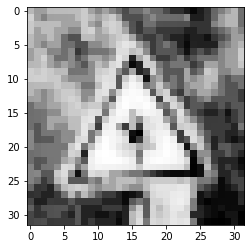

Beware of ice/snow Dangerous curve to the right


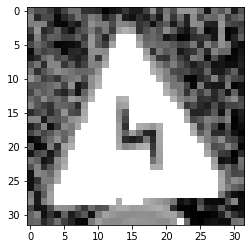

Double curve Slippery road


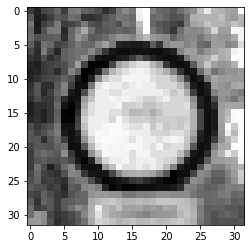

No vehicles No passing


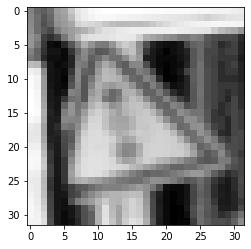

Traffic signals Road work


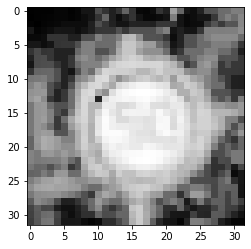

Speed limit (50km/h) Speed limit (80km/h)


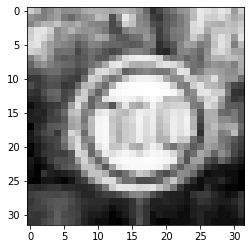

Speed limit (100km/h) Speed limit (120km/h)


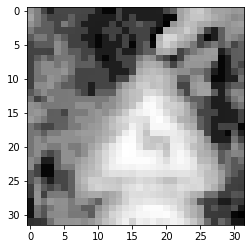

Double curve Wild animals crossing


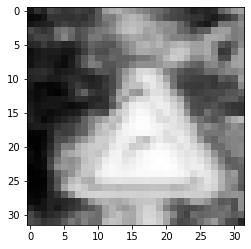

Dangerous curve to the right Wild animals crossing


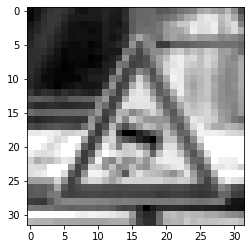

Slippery road Beware of ice/snow


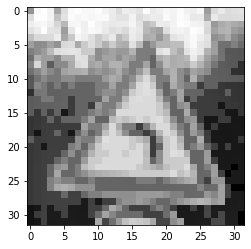

Dangerous curve to the left Slippery road


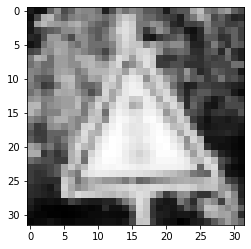

Traffic signals General caution


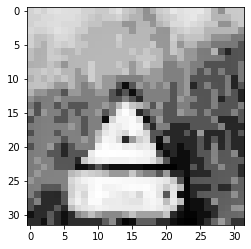

Wild animals crossing Children crossing


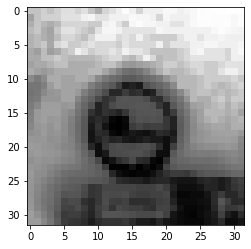

No passing for vehicles over 3.5 metric tons Speed limit (80km/h)


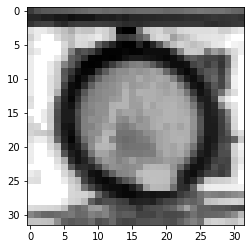

No vehicles End of all speed and passing limits


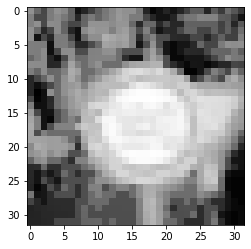

Speed limit (100km/h) Speed limit (80km/h)


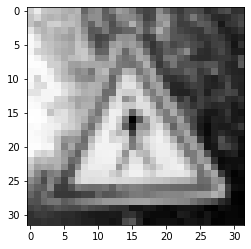

Pedestrians Traffic signals


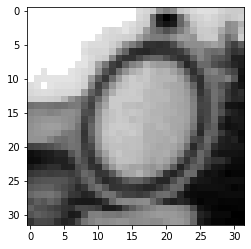

No vehicles End of all speed and passing limits


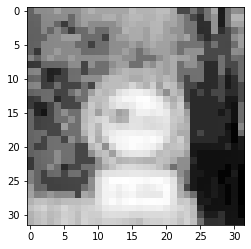

No passing for vehicles over 3.5 metric tons Roundabout mandatory


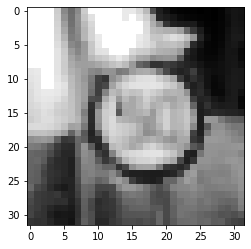

Speed limit (50km/h) Speed limit (80km/h)


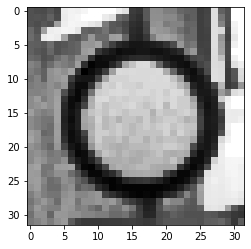

No vehicles End of all speed and passing limits


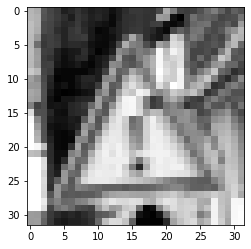

General caution Traffic signals


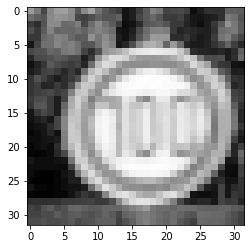

Speed limit (100km/h) Speed limit (120km/h)


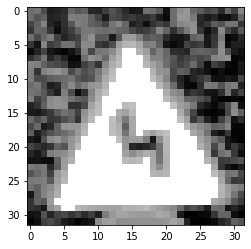

Double curve Children crossing


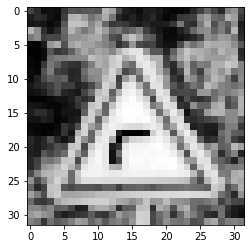

Dangerous curve to the right Slippery road


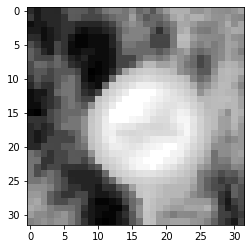

End of no passing No passing


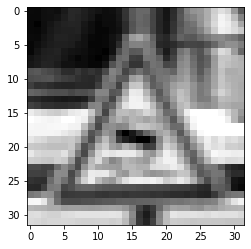

Slippery road Children crossing


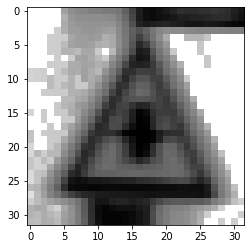

Right-of-way at the next intersection Children crossing


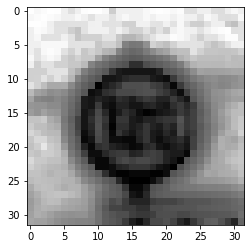

Speed limit (120km/h) Speed limit (100km/h)


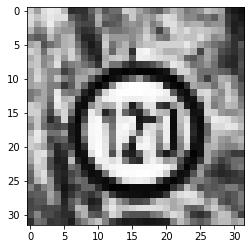

Speed limit (120km/h) Speed limit (100km/h)


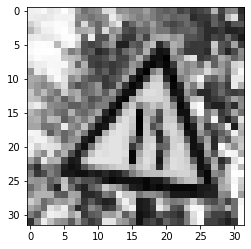

Road narrows on the right Traffic signals


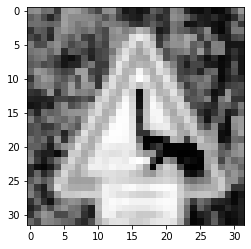

General caution Children crossing


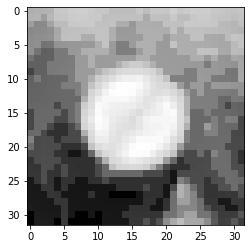

End of speed limit (80km/h) No vehicles


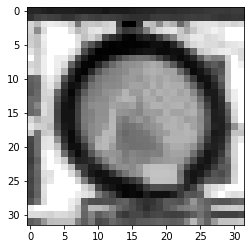

No vehicles Roundabout mandatory


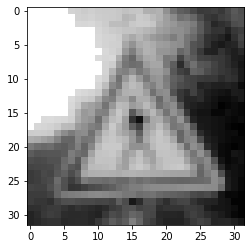

Pedestrians Traffic signals


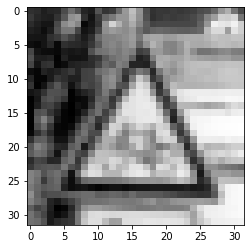

Bicycles crossing Double curve


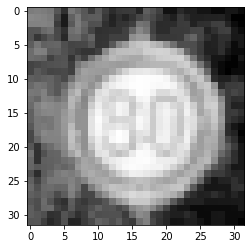

Speed limit (80km/h) Speed limit (50km/h)


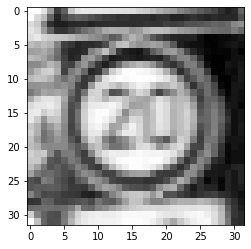

Speed limit (20km/h) Speed limit (30km/h)


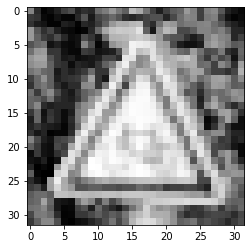

Bicycles crossing Children crossing


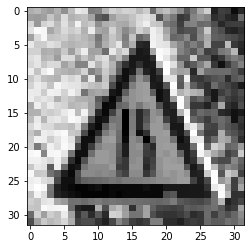

Road narrows on the right Traffic signals


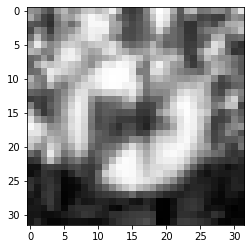

End of no passing by vehicles over 3.5 metric tons Priority road


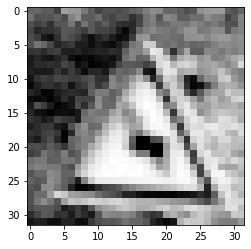

Double curve Wild animals crossing


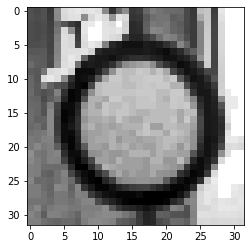

No vehicles End of all speed and passing limits


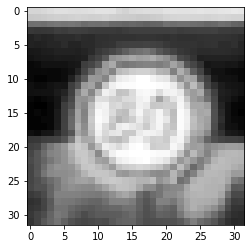

Speed limit (80km/h) Speed limit (50km/h)


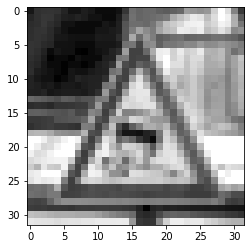

Slippery road Beware of ice/snow


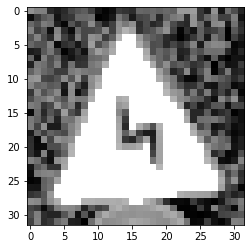

Double curve Slippery road


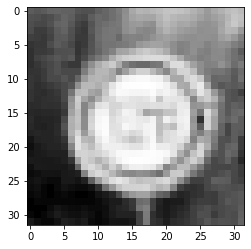

Speed limit (120km/h) Speed limit (100km/h)


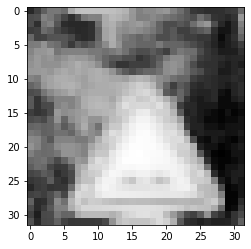

Bumpy road Traffic signals


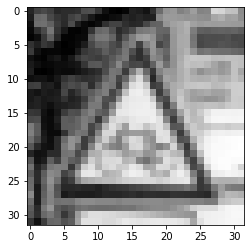

Bicycles crossing Double curve


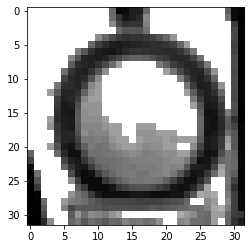

No vehicles Roundabout mandatory


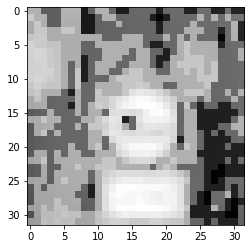

No passing for vehicles over 3.5 metric tons Roundabout mandatory


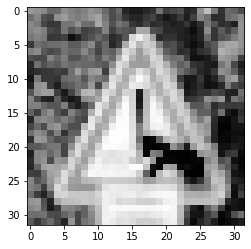

General caution Bumpy road


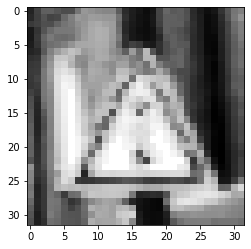

Traffic signals General caution


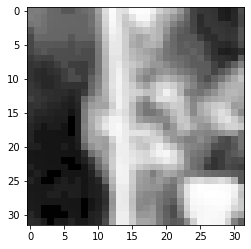

Roundabout mandatory Priority road


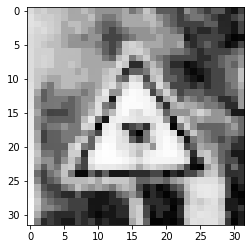

Beware of ice/snow Dangerous curve to the right


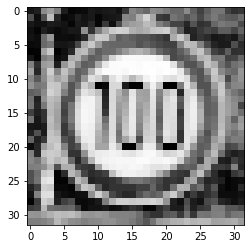

Speed limit (100km/h) Speed limit (120km/h)


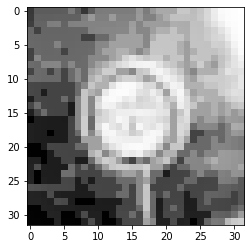

Speed limit (120km/h) Speed limit (50km/h)


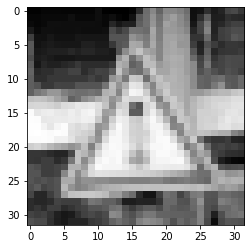

Traffic signals General caution


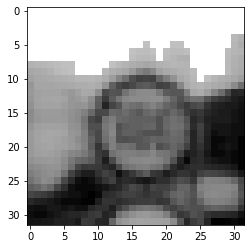

Speed limit (100km/h) Speed limit (80km/h)


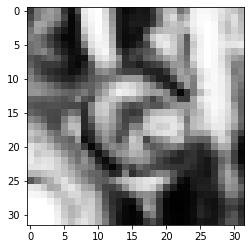

Speed limit (70km/h) Stop


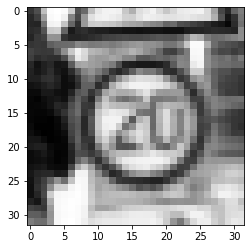

Speed limit (20km/h) Speed limit (30km/h)


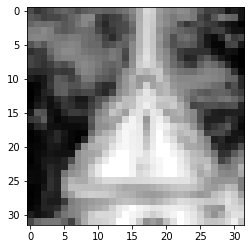

General caution Traffic signals


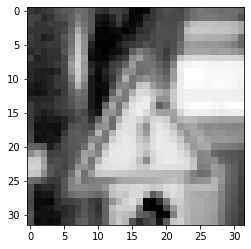

General caution Children crossing


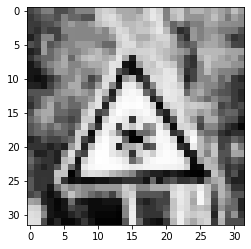

Beware of ice/snow Dangerous curve to the right


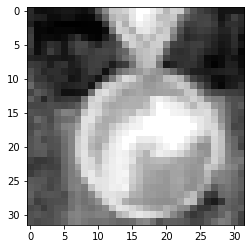

Turn right ahead Go straight or right


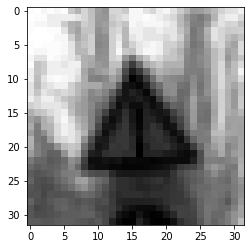

General caution Roundabout mandatory


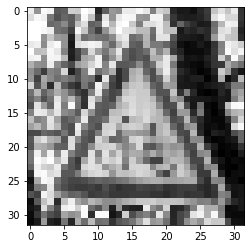

Bicycles crossing Children crossing


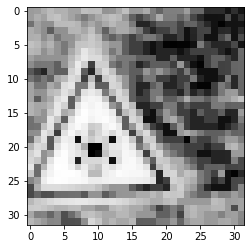

Beware of ice/snow Priority road


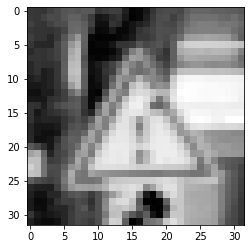

General caution Children crossing


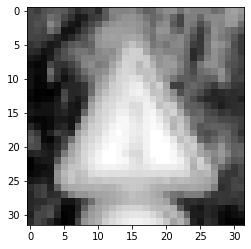

Traffic signals General caution


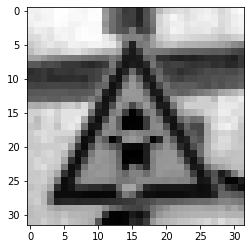

Right-of-way at the next intersection Children crossing


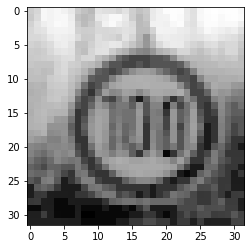

Speed limit (100km/h) Speed limit (120km/h)


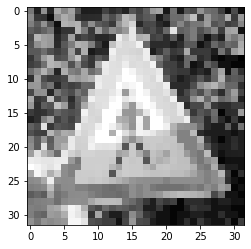

Pedestrians Children crossing


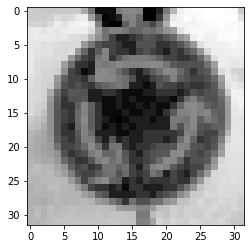

Roundabout mandatory Priority road


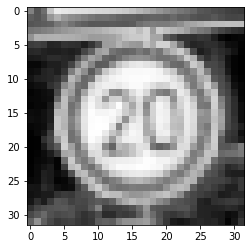

Speed limit (20km/h) Speed limit (120km/h)


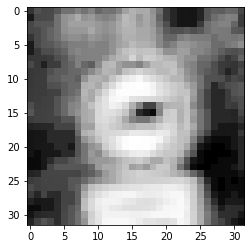

Vehicles over 3.5 metric tons prohibited Speed limit (50km/h)


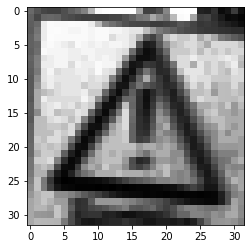

General caution Bumpy road


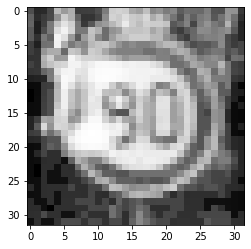

Speed limit (80km/h) Speed limit (50km/h)


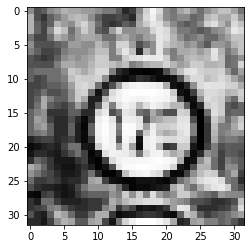

Speed limit (120km/h) Speed limit (100km/h)


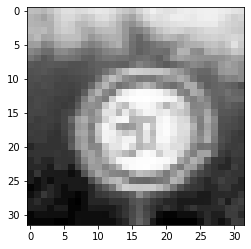

Speed limit (80km/h) Speed limit (50km/h)


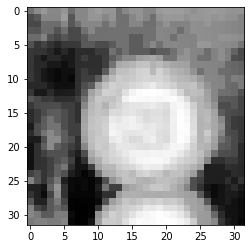

Speed limit (120km/h) Speed limit (80km/h)


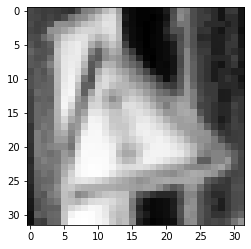

Traffic signals Right-of-way at the next intersection


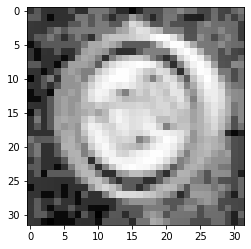

Speed limit (120km/h) Speed limit (80km/h)


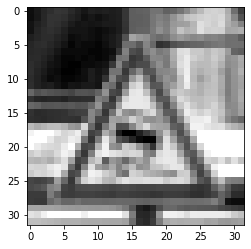

Slippery road Children crossing


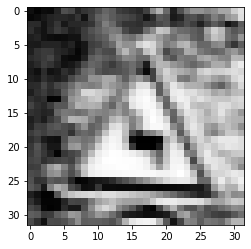

Double curve Wild animals crossing


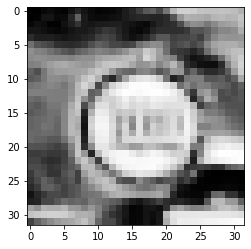

Speed limit (100km/h) Speed limit (80km/h)


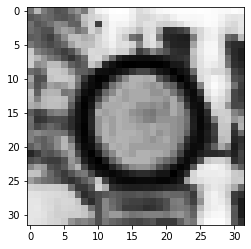

No vehicles Speed limit (60km/h)


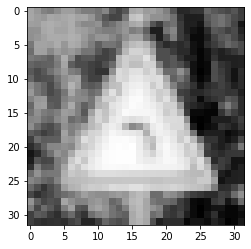

Dangerous curve to the left Slippery road


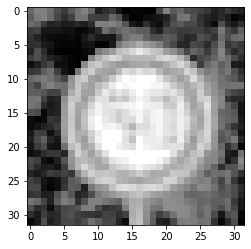

Speed limit (50km/h) Speed limit (80km/h)


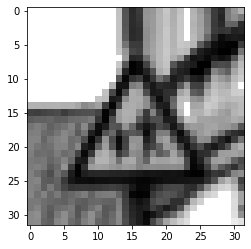

Children crossing Dangerous curve to the right


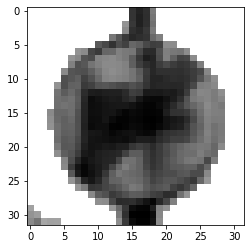

End of no passing by vehicles over 3.5 metric tons Ahead only


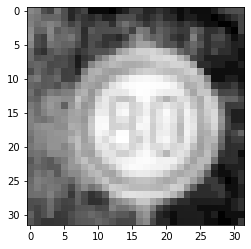

Speed limit (80km/h) Speed limit (50km/h)


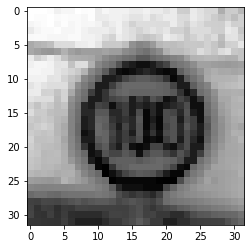

Speed limit (100km/h) Speed limit (120km/h)


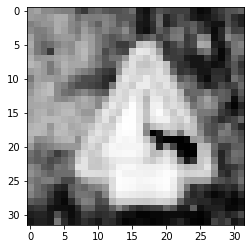

General caution End of speed limit (80km/h)


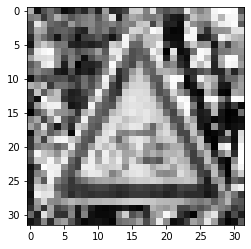

Bicycles crossing Children crossing


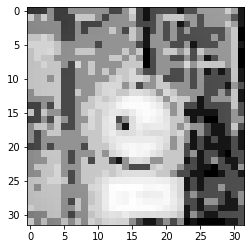

No passing for vehicles over 3.5 metric tons Speed limit (50km/h)


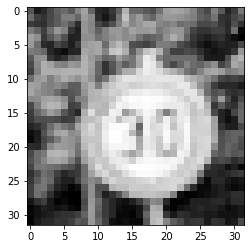

Speed limit (30km/h) Speed limit (50km/h)


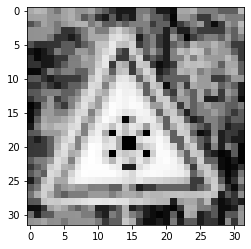

Beware of ice/snow Slippery road


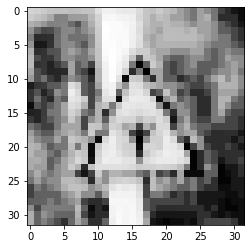

Beware of ice/snow Children crossing


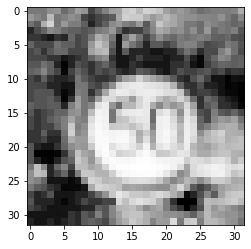

Speed limit (50km/h) Speed limit (80km/h)


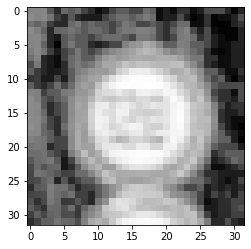

Speed limit (120km/h) Speed limit (30km/h)


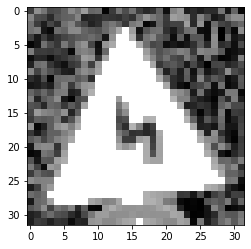

Double curve Children crossing


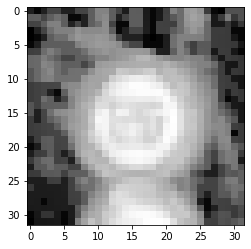

Speed limit (120km/h) Speed limit (80km/h)


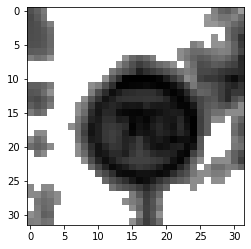

Speed limit (70km/h) Speed limit (30km/h)


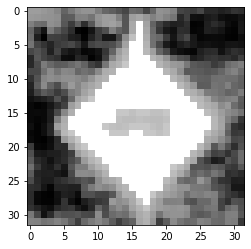

Priority road End of no passing


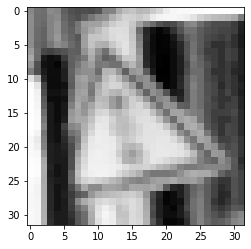

Traffic signals Road work


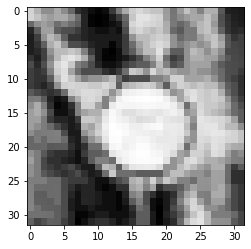

Speed limit (70km/h) Vehicles over 3.5 metric tons prohibited


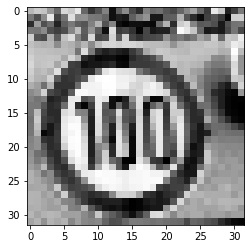

Speed limit (100km/h) Speed limit (80km/h)


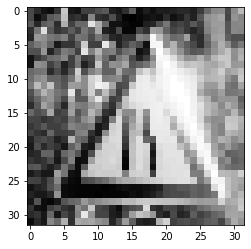

Road narrows on the right Children crossing


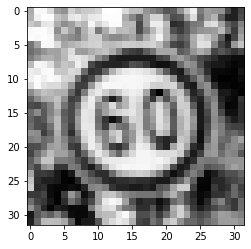

Speed limit (60km/h) Speed limit (80km/h)


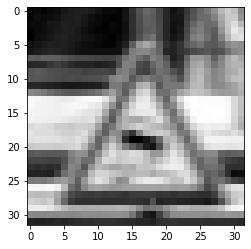

Slippery road Double curve


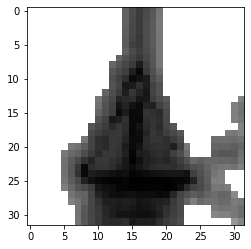

General caution Road work


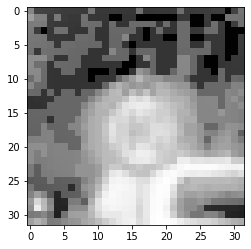

Speed limit (80km/h) Roundabout mandatory


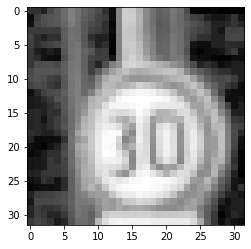

Speed limit (30km/h) Speed limit (50km/h)


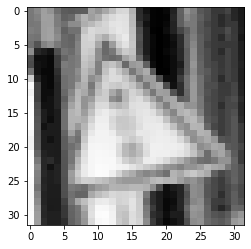

Traffic signals Road work


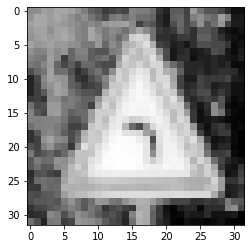

Dangerous curve to the left Slippery road


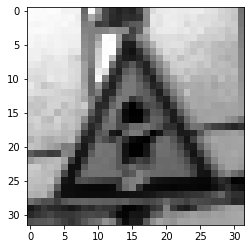

Right-of-way at the next intersection Children crossing


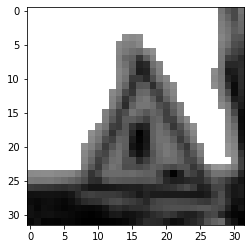

Road work Right-of-way at the next intersection


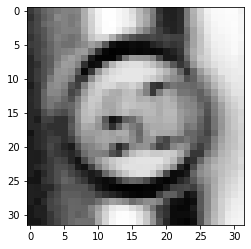

Speed limit (60km/h) Speed limit (80km/h)


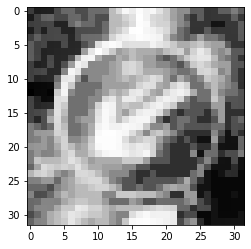

Keep left Roundabout mandatory


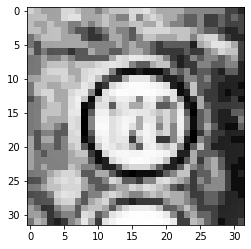

Speed limit (120km/h) Speed limit (100km/h)


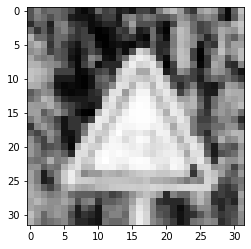

Bicycles crossing Children crossing


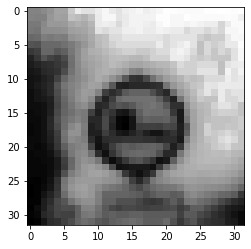

No passing for vehicles over 3.5 metric tons Roundabout mandatory


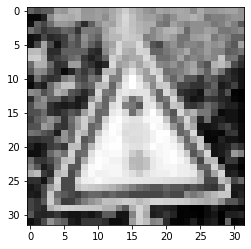

Traffic signals General caution


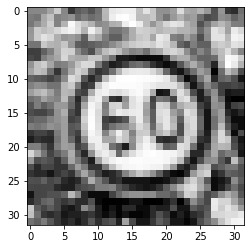

Speed limit (60km/h) Speed limit (80km/h)


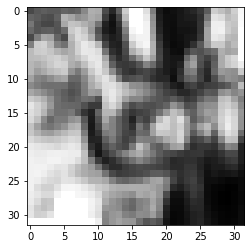

Speed limit (70km/h) Priority road


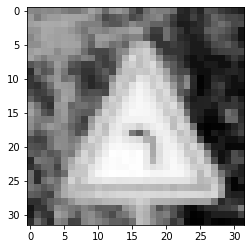

Dangerous curve to the left Slippery road


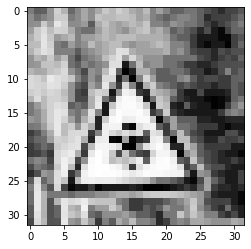

Beware of ice/snow Slippery road


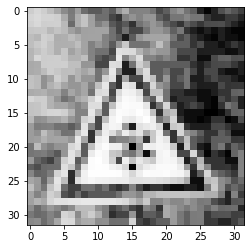

Beware of ice/snow Bicycles crossing


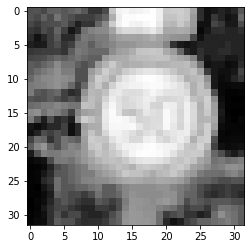

Speed limit (50km/h) Speed limit (80km/h)


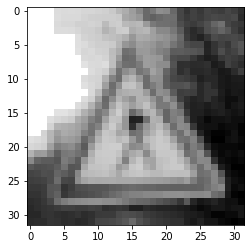

Pedestrians Traffic signals


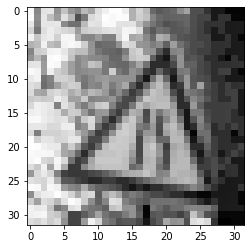

Road narrows on the right Traffic signals


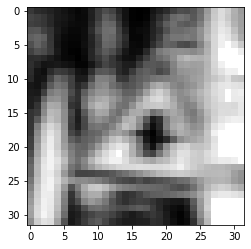

Right-of-way at the next intersection Children crossing


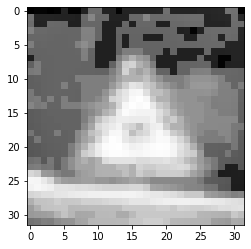

Beware of ice/snow Slippery road


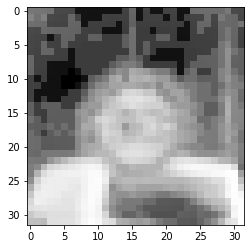

Speed limit (80km/h) Speed limit (50km/h)


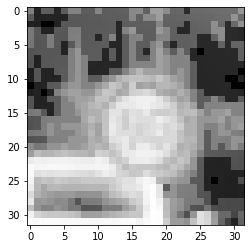

Speed limit (80km/h) Speed limit (50km/h)


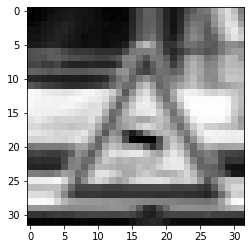

Slippery road Children crossing


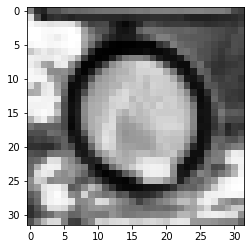

No vehicles Roundabout mandatory


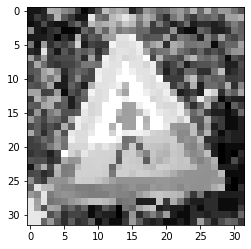

Pedestrians Roundabout mandatory


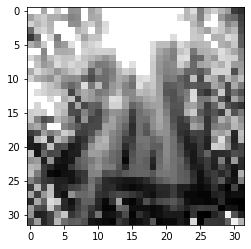

Road narrows on the right Traffic signals


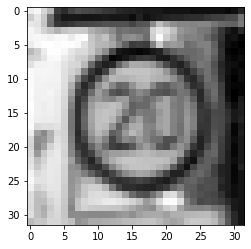

Speed limit (20km/h) Speed limit (30km/h)


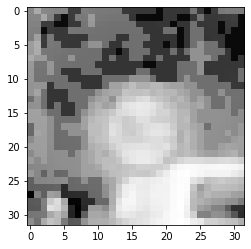

Speed limit (80km/h) Roundabout mandatory


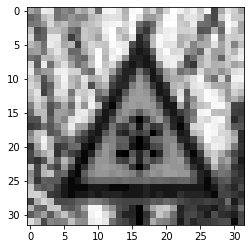

Beware of ice/snow Children crossing


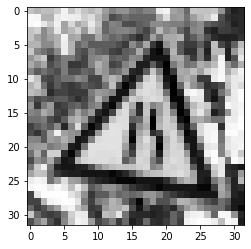

Road narrows on the right Traffic signals


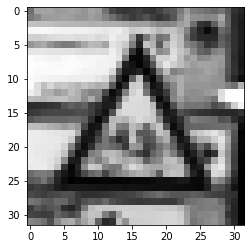

Bicycles crossing Children crossing


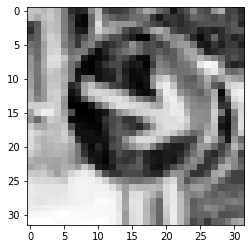

Keep right Turn left ahead


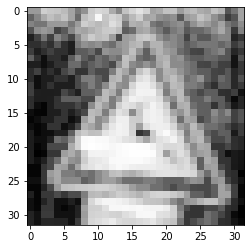

Wild animals crossing Slippery road


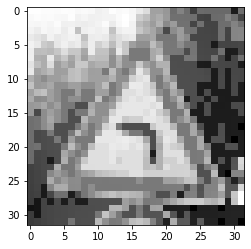

Dangerous curve to the left Slippery road


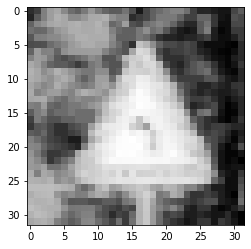

Dangerous curve to the left Slippery road


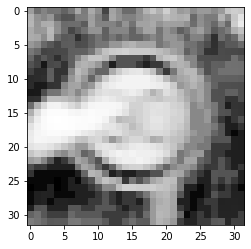

Speed limit (80km/h) Speed limit (30km/h)


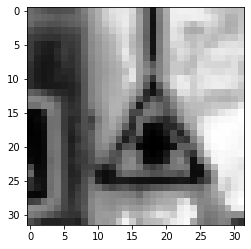

Right-of-way at the next intersection Children crossing


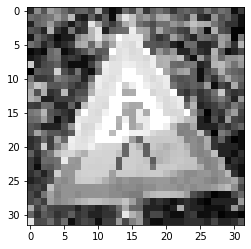

Pedestrians Roundabout mandatory


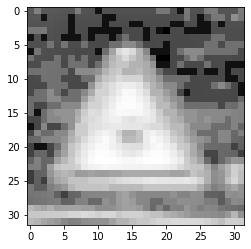

Beware of ice/snow Slippery road


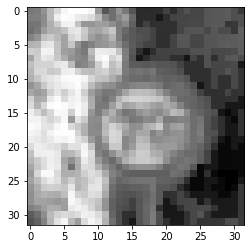

Speed limit (70km/h) Roundabout mandatory


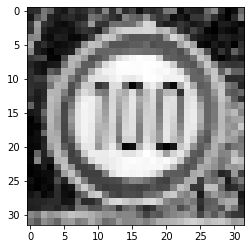

Speed limit (100km/h) Speed limit (120km/h)


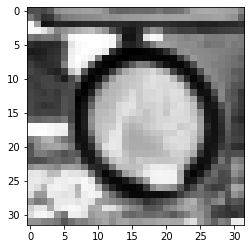

No vehicles End of all speed and passing limits


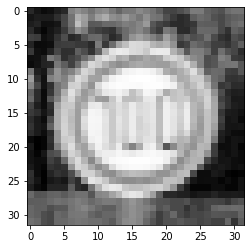

Speed limit (100km/h) Speed limit (120km/h)


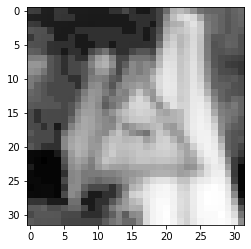

Slippery road Children crossing


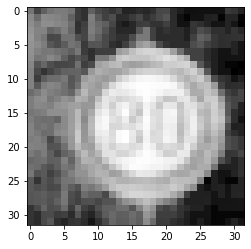

Speed limit (80km/h) Speed limit (50km/h)


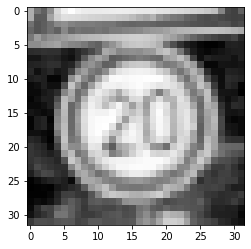

Speed limit (20km/h) Speed limit (30km/h)


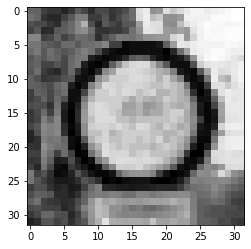

No vehicles Vehicles over 3.5 metric tons prohibited


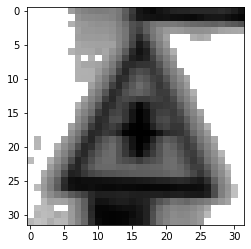

Right-of-way at the next intersection Children crossing


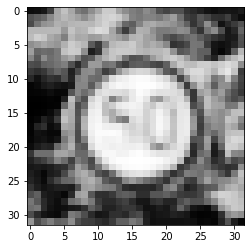

Speed limit (50km/h) Speed limit (80km/h)


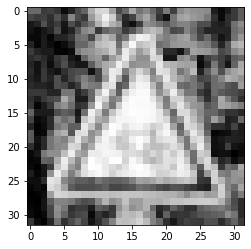

Bicycles crossing Children crossing


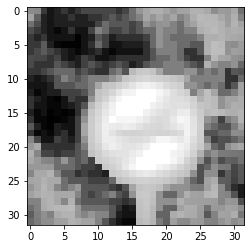

End of no passing No passing


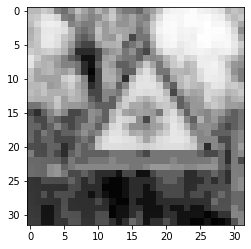

Beware of ice/snow Children crossing


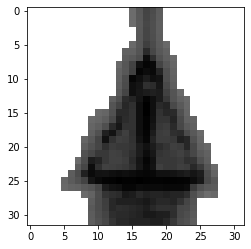

General caution Children crossing


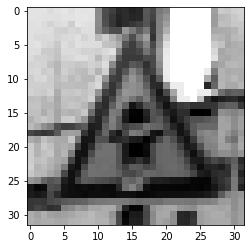

Right-of-way at the next intersection Children crossing


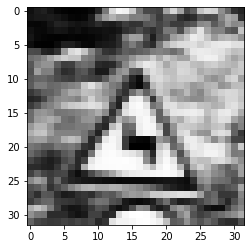

Double curve Wild animals crossing


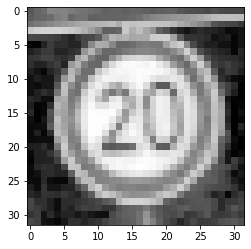

Speed limit (20km/h) Speed limit (120km/h)


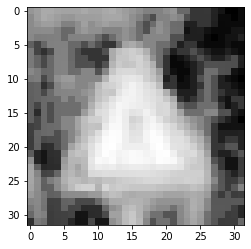

Pedestrians Children crossing


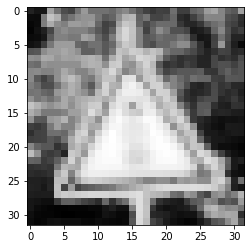

Traffic signals General caution


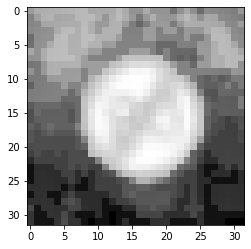

End of speed limit (80km/h) End of no passing by vehicles over 3.5 metric tons


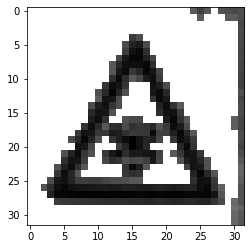

Beware of ice/snow Slippery road


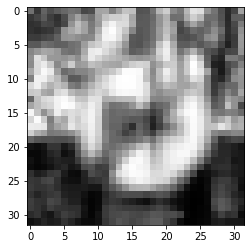

End of no passing by vehicles over 3.5 metric tons Priority road


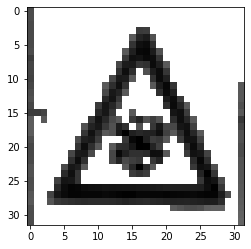

Beware of ice/snow Slippery road


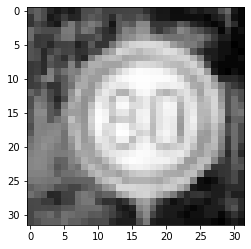

Speed limit (80km/h) Speed limit (50km/h)


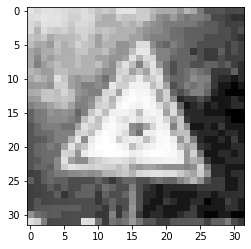

Beware of ice/snow Children crossing


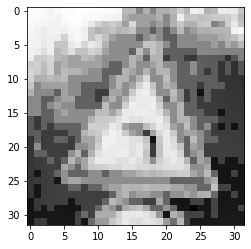

Dangerous curve to the left Slippery road


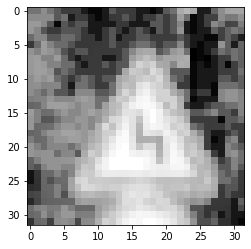

Double curve Wild animals crossing


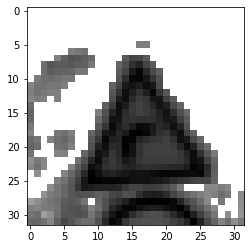

Dangerous curve to the right Children crossing


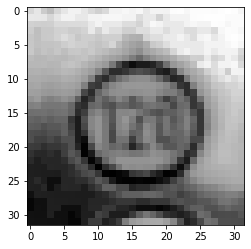

Speed limit (120km/h) Speed limit (100km/h)


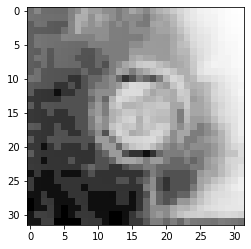

Speed limit (120km/h) Speed limit (30km/h)


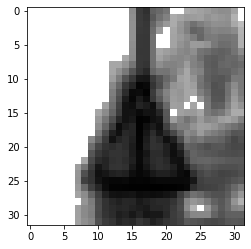

General caution Ahead only


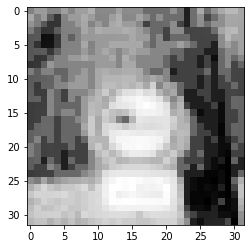

No passing for vehicles over 3.5 metric tons Roundabout mandatory


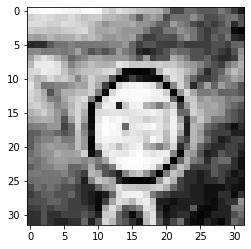

Speed limit (30km/h) Speed limit (80km/h)


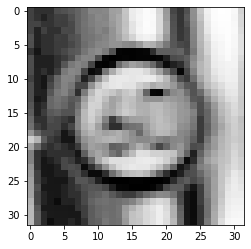

Speed limit (60km/h) Speed limit (80km/h)


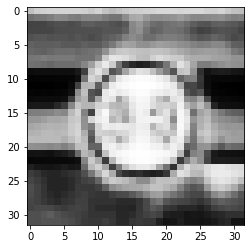

Speed limit (80km/h) Speed limit (60km/h)


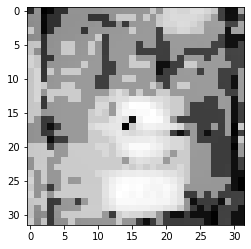

No passing for vehicles over 3.5 metric tons Roundabout mandatory


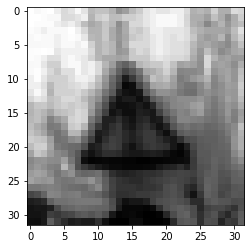

General caution Children crossing


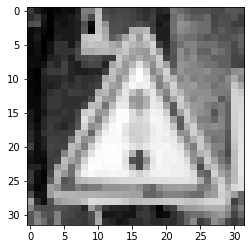

Traffic signals General caution


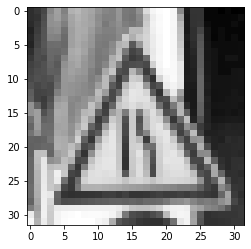

Road narrows on the right Traffic signals


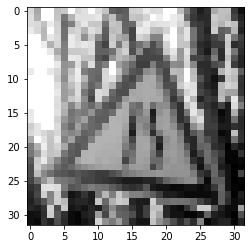

Road narrows on the right Traffic signals


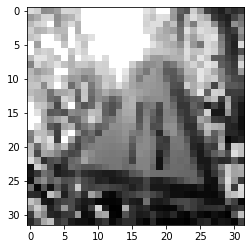

Road narrows on the right Traffic signals


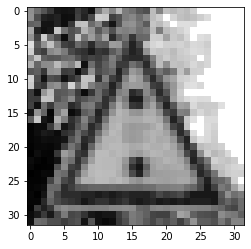

Traffic signals General caution


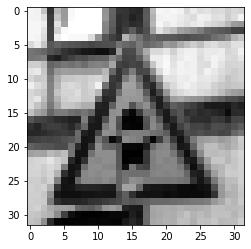

Right-of-way at the next intersection Beware of ice/snow


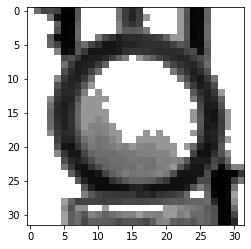

No vehicles Speed limit (60km/h)


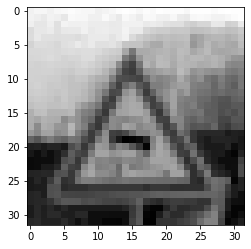

Slippery road Children crossing


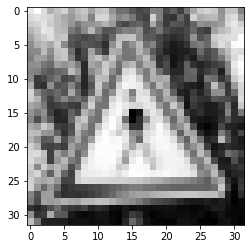

Pedestrians General caution


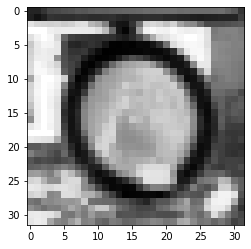

No vehicles End of all speed and passing limits


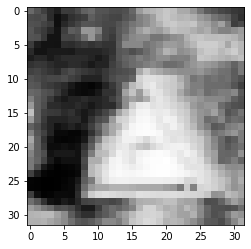

Dangerous curve to the right Speed limit (80km/h)


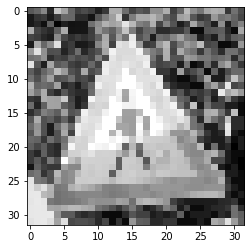

Pedestrians Roundabout mandatory


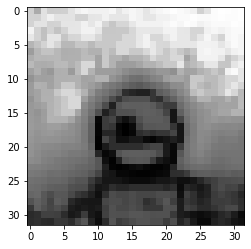

No passing for vehicles over 3.5 metric tons Roundabout mandatory


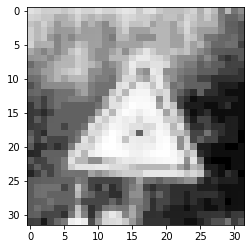

Beware of ice/snow Children crossing


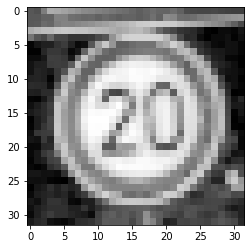

Speed limit (20km/h) Speed limit (120km/h)


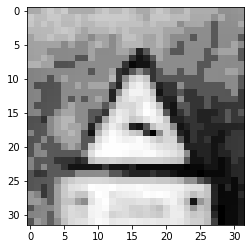

Wild animals crossing Slippery road


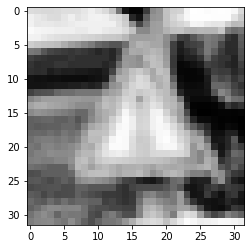

Traffic signals Road work


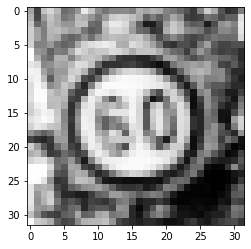

Speed limit (60km/h) Speed limit (80km/h)


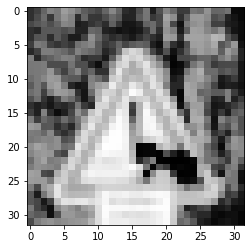

General caution Bumpy road


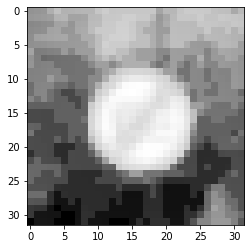

End of speed limit (80km/h) No vehicles


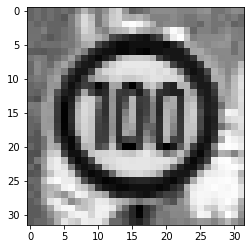

Speed limit (100km/h) Speed limit (120km/h)


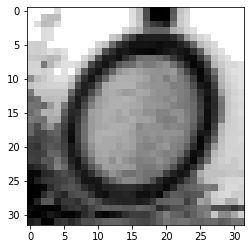

No vehicles End of all speed and passing limits


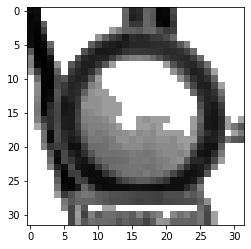

No vehicles No passing for vehicles over 3.5 metric tons


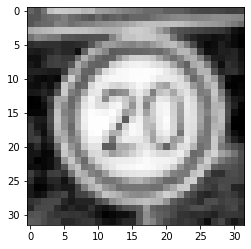

Speed limit (20km/h) Speed limit (120km/h)


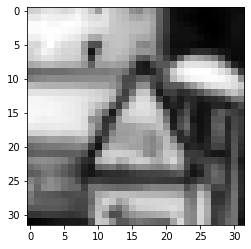

Bicycles crossing Children crossing


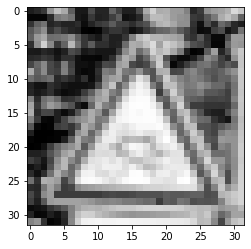

Bicycles crossing Wild animals crossing


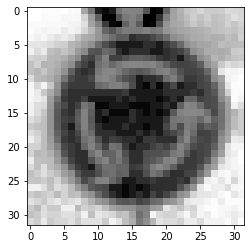

Roundabout mandatory Priority road


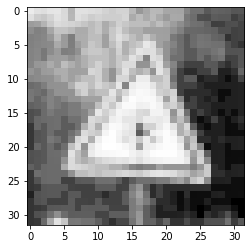

Beware of ice/snow Children crossing


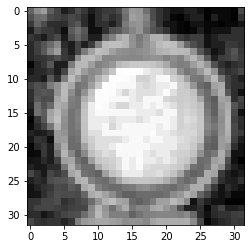

No vehicles End of all speed and passing limits


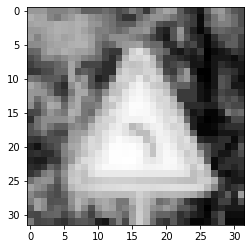

Dangerous curve to the left Slippery road


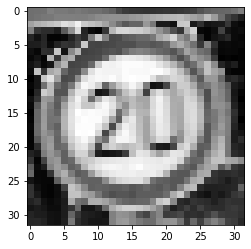

Speed limit (20km/h) Speed limit (30km/h)


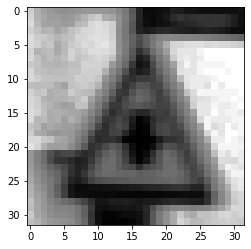

Right-of-way at the next intersection Beware of ice/snow


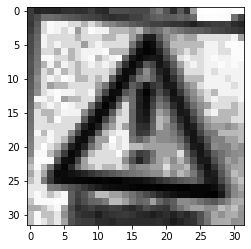

General caution Road work


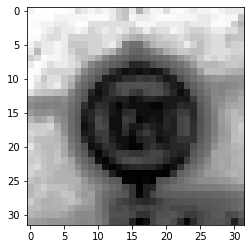

Speed limit (120km/h) Speed limit (100km/h)


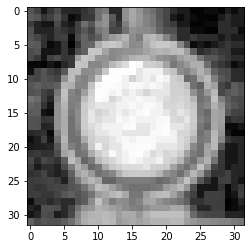

No vehicles Speed limit (80km/h)


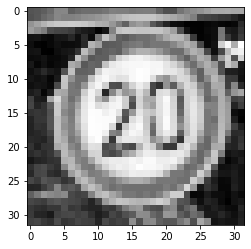

Speed limit (20km/h) Speed limit (120km/h)


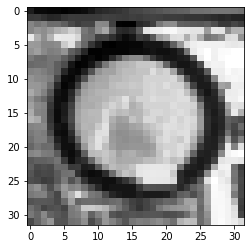

No vehicles Roundabout mandatory


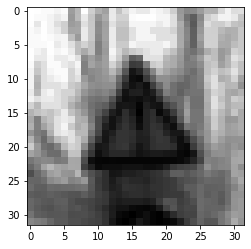

General caution Children crossing


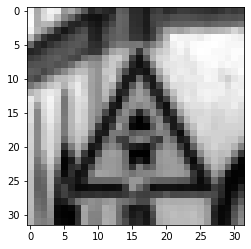

Right-of-way at the next intersection Beware of ice/snow


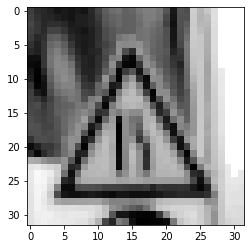

Road narrows on the right Traffic signals


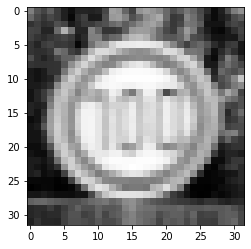

Speed limit (100km/h) Speed limit (120km/h)


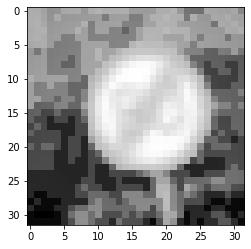

End of speed limit (80km/h) End of no passing by vehicles over 3.5 metric tons


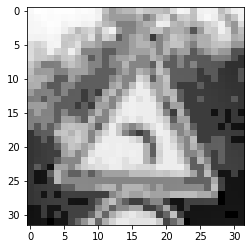

Dangerous curve to the left Slippery road


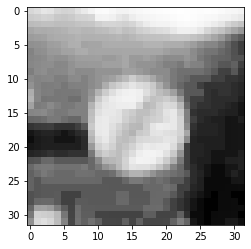

End of speed limit (80km/h) Roundabout mandatory


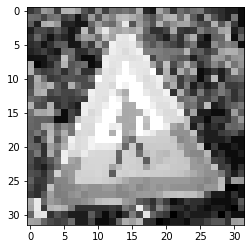

Pedestrians Children crossing


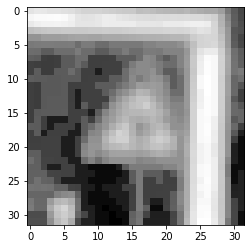

Beware of ice/snow Roundabout mandatory


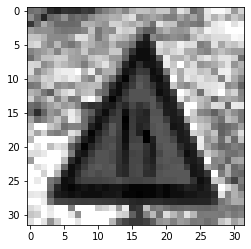

Road narrows on the right Traffic signals


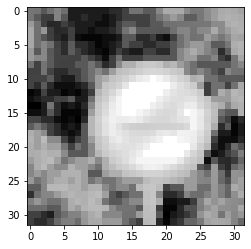

End of no passing No passing


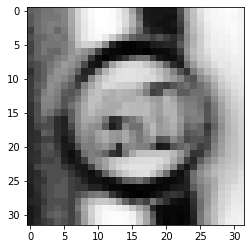

Speed limit (60km/h) Speed limit (80km/h)


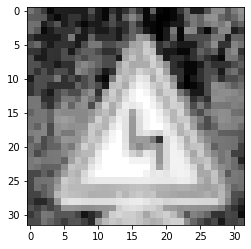

Double curve Wild animals crossing


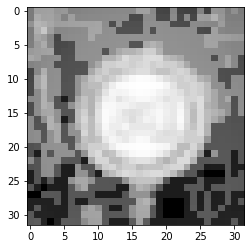

Speed limit (80km/h) Speed limit (50km/h)


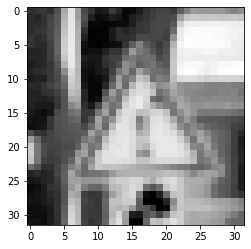

General caution Children crossing


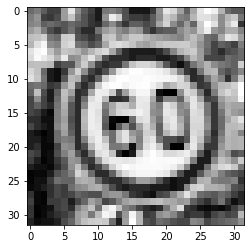

Speed limit (60km/h) Speed limit (80km/h)


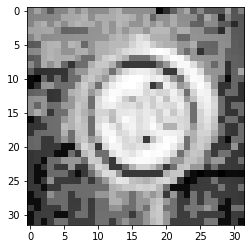

Speed limit (120km/h) Speed limit (80km/h)


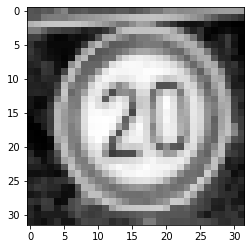

Speed limit (20km/h) Speed limit (120km/h)


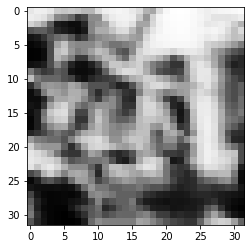

Roundabout mandatory Go straight or left


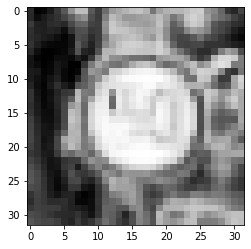

Speed limit (50km/h) Speed limit (80km/h)


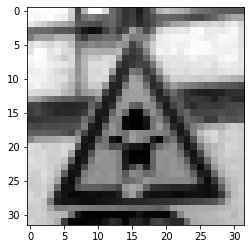

Right-of-way at the next intersection Children crossing


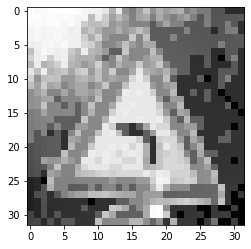

Dangerous curve to the left Slippery road


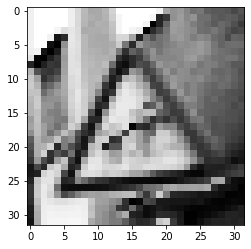

Children crossing Dangerous curve to the right


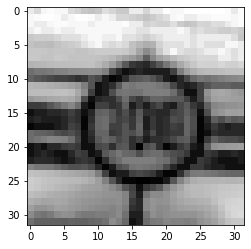

Speed limit (100km/h) Speed limit (120km/h)


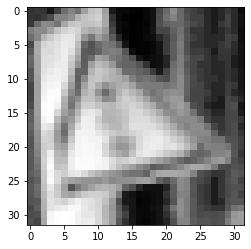

Traffic signals Road work


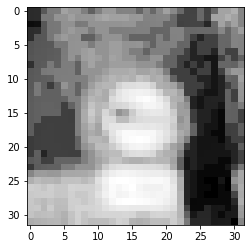

No passing for vehicles over 3.5 metric tons Dangerous curve to the right


KeyboardInterrupt: ignored

In [ ]:
# predict=model.predict_classes(testxp,batch_size=batch_size)
for i in range(12630):
 if(classes[testyp[i]]!=classes[predict[i]]):

   showim(testxp[i])
   print(classes[testyp[i]],classes[predict[i]])